In [77]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np, seaborn as sns 

In [2]:
rosetta0 = pd.read_csv("rosetta.csv")
rosetta0.columns

Index(['Unnamed: 0', 'PERSONA_REF_ID', 'HOGAR_REF_ID', 'SEXO', 'EDAD',
       'P_NACDAD', 'P_ALFAB', 'P_CONMPU', 'P_ASISTEDU', 'P_NIVELED',
       'P_COMPLED', 'CONDACT', 'VIVIENDA_REF_ID', 'H_MAT_PISO', 'H_MAT_CUBTA',
       'H_REVEST', 'H_AGUA', 'H_PROC_AGUA', 'BAÑO', 'H_LIMP_I', 'H_DESAGUE_I',
       'H_BAÑO_EXC', 'H_COMBUST', 'H_HABI_DOR', 'H_HABI_TOT', 'HELADERA',
       'H_COMPUTADORA', 'CELULAR', 'TELEFONO', 'PROP', 'INDHAC', 'TOTPERS',
       'ALGUNBI', 'RADIO_REF_ID', 'VV_TIPO', 'VV_PART', 'VV_OCUP', 'VV_COLEC',
       'VV_CALIDAD_SERVS', 'VV_CALIDAD_MAT', 'VV_CALIDAD_CONS', 'RADIO'],
      dtype='object')

In [3]:
rosetta = rosetta0.drop(['Unnamed: 0'], axis=1)

In [4]:
tabla_intermedia0 = pd.read_csv("tabla_intermedia.csv")

In [5]:
tabla_intermedia0.drop(["Unnamed: 0"], axis=1)
tabla_intermedia = tabla_intermedia0[["RADIO",	"circuito",	"RADIO.CIRCUITO"]]
tabla_intermedia["circuito"] = tabla_intermedia["circuito"].astype(str)

C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\1707172542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_intermedia["circuito"] = tabla_intermedia["circuito"].astype(str)


In [6]:
strp = tabla_intermedia["circuito"].str.pad(width=4, side="left", fillchar="0")
strp.to_frame()

circuito
0        0005
1        0005
2        0005
3        0005
4        0005
...       ...
3545     0158
3546     0158
3547     0158
3548     0158
3549     0158

[3550 rows x 1 columns]

In [7]:
tabla_intermedia['circuito'] = strp
#tabla_intermedia.to_csv('tabla_intermedia2.csv')
tabla_intermedia

C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\2577577587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_intermedia['circuito'] = strp


RADIO circuito  RADIO.CIRCUITO
0     20010101     0005        20010005
1     20010201     0005        20010005
2     20010202     0005        20010005
3     20010203     0005        20010005
4     20010204     0005        20010005
...        ...      ...             ...
3545  20152109     0158        20150158
3546  20152110     0158        20150158
3547  20152111     0158        20150158
3548  20152112     0158        20150158
3549  20152113     0158        20150158

[3550 rows x 3 columns]

In [8]:
circuitos_geometria = gpd.read_file("CABA.shp")
circuitos_geometria = circuitos_geometria[["circuito",	"geometry"]]
circuitos_geometria

circuito                                           geometry
0       0003  POLYGON Z ((-6496304.252 -4084732.697 0.000, -...
1       0045  POLYGON Z ((-6501230.474 -4091702.182 0.000, -...
2       0037  POLYGON Z ((-6501166.688 -4087904.826 0.000, -...
3       0018  POLYGON Z ((-6498832.986 -4088373.028 0.000, -...
4       0141  POLYGON Z ((-6503862.400 -4078547.361 0.000, -...
..       ...                                                ...
162     0135  POLYGON Z ((-6507834.614 -4077215.626 0.000, -...
163     0149  POLYGON Z ((-6503253.371 -4080723.227 0.000, -...
164     0101  POLYGON Z ((-6515182.479 -4090061.116 0.000, -...
165     0102  POLYGON Z ((-6514598.831 -4088679.114 0.000, -...
166     0088  POLYGON Z ((-6509495.834 -4096454.887 0.000, -...

[167 rows x 2 columns]

In [9]:
voto_circuito = pd.read_csv("voto_circuito.csv")
voto_circuito

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.2  circuito   pp1   pp2   pp3   pp4  \
0             0             0             0         1  1955  2113  1237  1182   
1             1             1             1         2  2005  2122  1220  1390   
2             2             2             2         3   600   812   286   383   
3             3             3             3         4   336   371   140   196   
4             4             4             4         5  4053  4071  3029  2929   
..          ...           ...           ...       ...   ...   ...   ...   ...   
162         162           162           162       163  2290  2276  2040  2174   
163         163           163           163       164  2095  1900  2039  2106   
164         164           164           164       165  3618  3588  3157  3399   
165         165           165           165       166  2970  2569  2773  2878   
166         166           166           166       167  2358  2033  2091  2317   

       nv  suma_votos                                           geometry  \
0    1655        8142  POLYGON Z ((-6497294.216384983 -4088142.492831...   
1    1618        8355  POLYGON Z ((-6498537.655097145 -4087740.683913...   
2     509        2590  POLYGON Z ((-6496304.252153359 -4084732.696892...   
3     240        1283  POLYGON Z ((-6497398.411428367 -4087025.704760...   
4    3443       17525  MULTIPOLYGON Z (((-6497185.902520441 -4082052....   
..    ...         ...                                                ...   
162  2174       10954  POLYGON Z ((-6505348.070224387 -4083866.211011...   
163  2119       10259  POLYGON Z ((-6507652.049725334 -4084945.660606...   
164  3501       17263  POLYGON Z ((-6508638.340413763 -4081745.040090...   
165  2798       13988  POLYGON Z ((-6508941.686026175 -4083702.128802...   
166  2250       11049  POLYGON Z ((-6509514.870084269 -4084304.493367...   

     Porcentaje PP2  
0         25.951855  
1         25.397965  
2         31.351351  
3         28.916602  
4         23.229672  
..              ...  
162       20.777798  
163       18.520324  
164       20.784336  
165       18.365742  
166       18.399855  

[167 rows x 12 columns]

In [10]:
voto_circuito["Porcentaje PP2"] = voto_circuito["pp2"]/voto_circuito["suma_votos"]*100

In [11]:
suma_voto1 = voto_circuito["Porcentaje PP2"].to_frame()

In [12]:
voto_circuito["Porcentaje PP2"] = suma_voto1

In [13]:
voto_circuito = voto_circuito.astype("str")

In [14]:
voto_circuito["circuito"] = voto_circuito["circuito"].str.pad(width=4, side='left', fillchar='0')

In [15]:
voto_circuito["circuito"] = voto_circuito["circuito"].to_frame()

In [16]:
voto_circuito = voto_circuito.drop(["Unnamed: 0"], axis=1)

In [17]:
voto_circuito

Unnamed: 0.1 Unnamed: 0.2 circuito   pp1   pp2   pp3   pp4    nv  \
0              0            0     0001  1955  2113  1237  1182  1655   
1              1            1     0002  2005  2122  1220  1390  1618   
2              2            2     0003   600   812   286   383   509   
3              3            3     0004   336   371   140   196   240   
4              4            4     0005  4053  4071  3029  2929  3443   
..           ...          ...      ...   ...   ...   ...   ...   ...   
162          162          162     0163  2290  2276  2040  2174  2174   
163          163          163     0164  2095  1900  2039  2106  2119   
164          164          164     0165  3618  3588  3157  3399  3501   
165          165          165     0166  2970  2569  2773  2878  2798   
166          166          166     0167  2358  2033  2091  2317  2250   

    suma_votos                                           geometry  \
0         8142  POLYGON Z ((-6497294.216384983 -4088142.492831...   
1         8355  POLYGON Z ((-6498537.655097145 -4087740.683913...   
2         2590  POLYGON Z ((-6496304.252153359 -4084732.696892...   
3         1283  POLYGON Z ((-6497398.411428367 -4087025.704760...   
4        17525  MULTIPOLYGON Z (((-6497185.902520441 -4082052....   
..         ...                                                ...   
162      10954  POLYGON Z ((-6505348.070224387 -4083866.211011...   
163      10259  POLYGON Z ((-6507652.049725334 -4084945.660606...   
164      17263  POLYGON Z ((-6508638.340413763 -4081745.040090...   
165      13988  POLYGON Z ((-6508941.686026175 -4083702.128802...   
166      11049  POLYGON Z ((-6509514.870084269 -4084304.493367...   

         Porcentaje PP2  
0    25.951854581183987  
1     25.39796529024536  
2    31.351351351351354  
3      28.9166017147311  
4    23.229671897289585  
..                  ...  
162  20.777798064633924  
163  18.520323618286383  
164  20.784336442101605  
165  18.365742064626822  
166   18.39985519051498  

[167 rows x 11 columns]

In [101]:
voto_circuito2 = voto_circuito[["circuito","Porcentaje PP2"]]

### COMPUTADORA

##### Total Computadora/ Promedio

<AxesSubplot:>

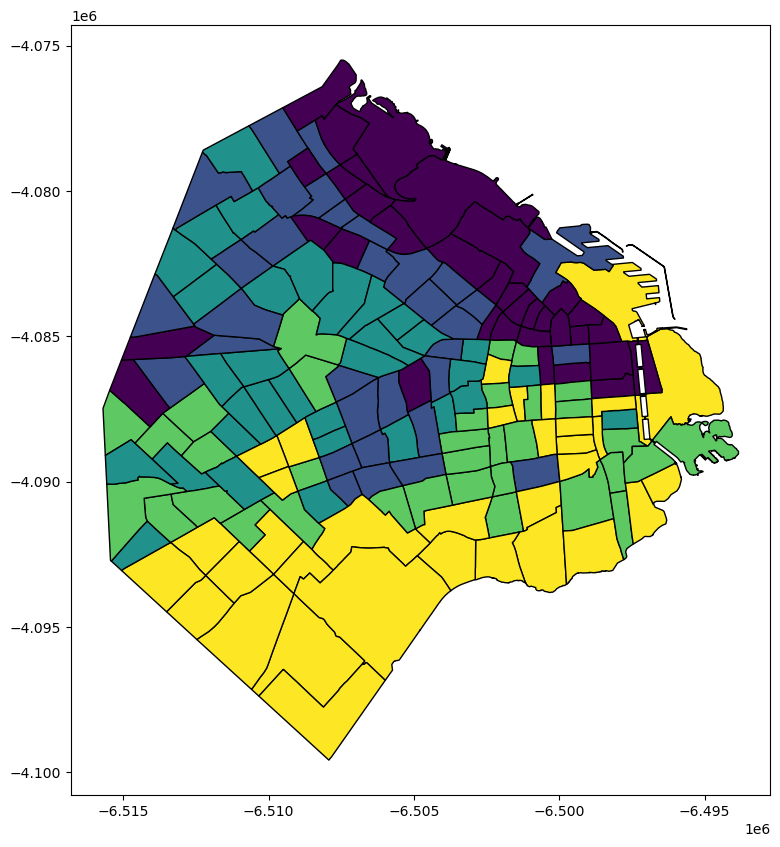

In [18]:
CO = rosetta[["RADIO","H_COMPUTADORA"]]
COM = pd.merge(CO,tabla_intermedia,on="RADIO",how="inner")
COME = pd.merge(tabla_intermedia,COM,on="RADIO",how="inner")
COME.rename(columns={"circuito_x":"circuito"},inplace=True)
COME = COME[["circuito","H_COMPUTADORA"]]
COMPUTADORA_agrupado = COME.groupby(['circuito']).mean()
COMPUTADORA_agrupado.reset_index(inplace=True)
COMPUTADORA_agrupado = COMPUTADORA_agrupado.rename(columns = {'index':'circuito'})
COMPMERG = pd.merge(circuitos_geometria,COMPUTADORA_agrupado,on="circuito",how="inner")
COMPMERG.plot(column='H_COMPUTADORA', scheme='quantiles', figsize=(10, 10),edgecolor="k")

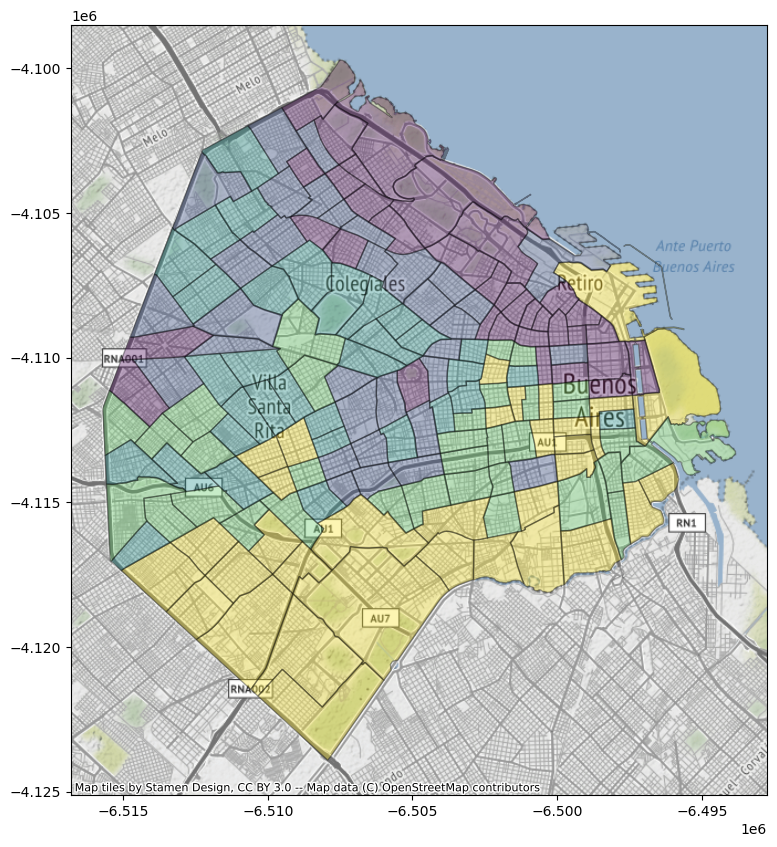

In [19]:
COMPMERG2 = COMPMERG.to_crs(epsg=3857)
ax = COMPMERG2.plot(column='H_COMPUTADORA',scheme='quantiles',figsize=(10, 10), alpha=0.35, edgecolor='k')
ctx.add_basemap(ax)

##### Computadora/ Posee

circuito                                           geometry  H_COMPUTADORA
0       0003  POLYGON Z ((-6496304.252 -4084732.697 0.000, -...           2089
1       0045  POLYGON Z ((-6501230.474 -4091702.182 0.000, -...           4832
2       0037  POLYGON Z ((-6501166.688 -4087904.826 0.000, -...           8088
3       0018  POLYGON Z ((-6498832.986 -4088373.028 0.000, -...           5131
4       0141  POLYGON Z ((-6503862.400 -4078547.361 0.000, -...          12032
..       ...                                                ...            ...
162     0135  POLYGON Z ((-6507834.614 -4077215.626 0.000, -...          10014
163     0149  POLYGON Z ((-6503253.371 -4080723.227 0.000, -...          23441
164     0101  POLYGON Z ((-6515182.479 -4090061.116 0.000, -...          12983
165     0102  POLYGON Z ((-6514598.831 -4088679.114 0.000, -...          10920
166     0088  POLYGON Z ((-6509495.834 -4096454.887 0.000, -...           9522

[167 rows x 3 columns]

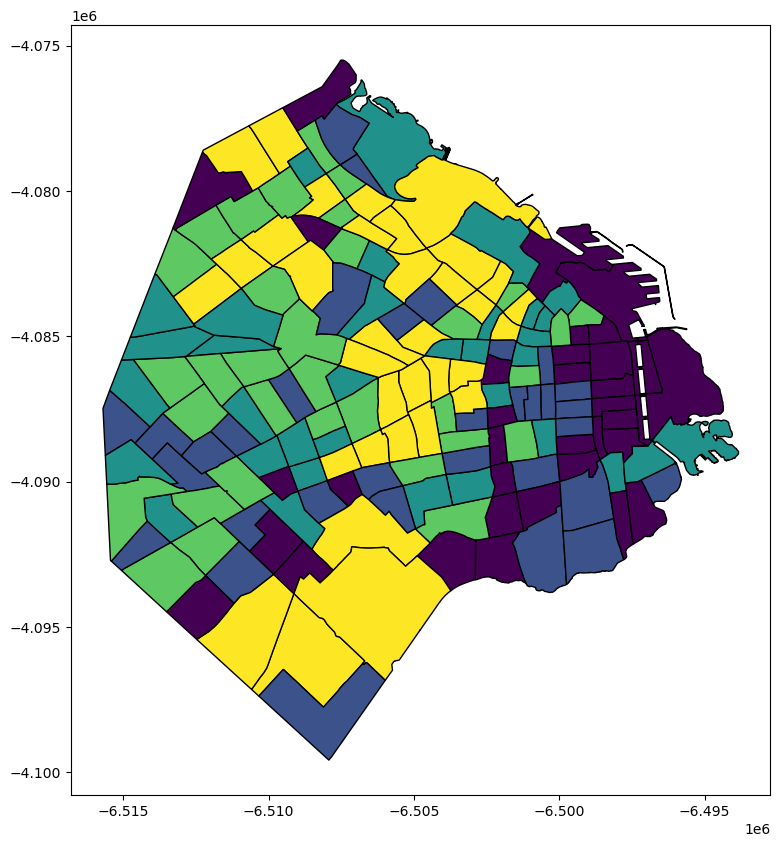

In [20]:
CO = rosetta[["RADIO","H_COMPUTADORA"]]
COM = pd.merge(CO,tabla_intermedia,on="RADIO",how="inner")
COME = pd.merge(tabla_intermedia,COM,on="RADIO",how="inner")
COME.rename(columns={"circuito_x":"circuito"},inplace=True)
COME = COME[["circuito","H_COMPUTADORA"]]
COME_1 = COME[COME["H_COMPUTADORA"]==1]
COME_1 = (COME_1[["circuito", "H_COMPUTADORA"]]
.groupby(["circuito"])
.count()
)
COME_1.reset_index(inplace=True)
COME_1 = COME_1.rename(columns = {'index':'circuito'})
COME_1 = pd.merge(circuitos_geometria,COME_1,on="circuito",how="inner")
COME_1.plot(column="H_COMPUTADORA", scheme='quantiles', figsize=(10, 10),edgecolor="k")
COME_1

##### Computadora/ No Posee

<AxesSubplot:>

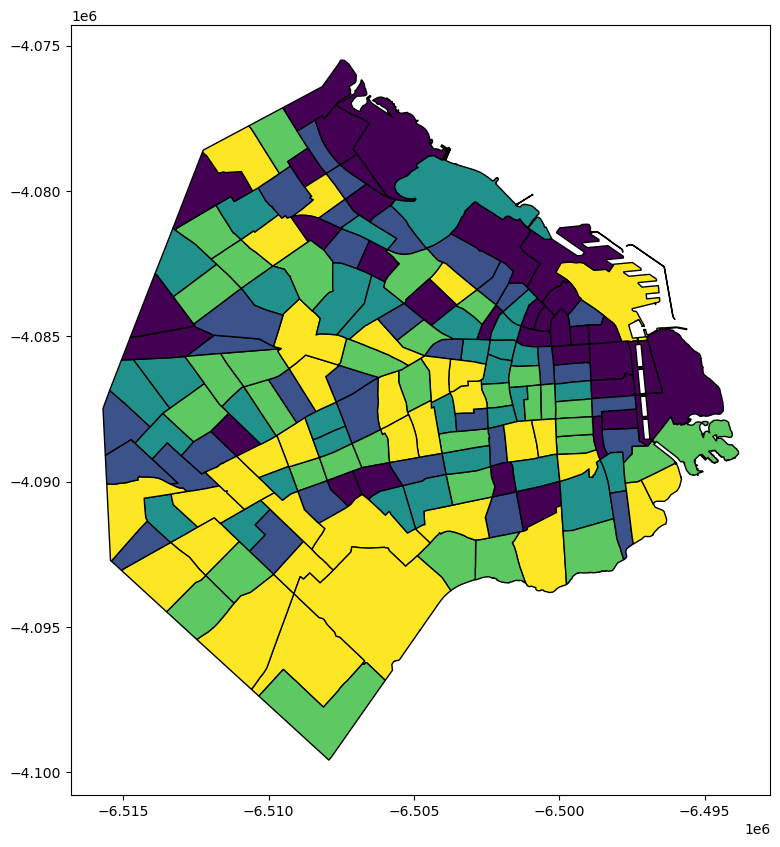

In [21]:
COME_2 = COME[COME["H_COMPUTADORA"]==2]
COME_2 = (COME_2[["circuito", "H_COMPUTADORA"]]
.groupby(["circuito"])
.count()
)
COME_2.reset_index(inplace=True)
COME_2 = COME_2.rename(columns = {'index':'circuito'})
COME_2 = pd.merge(circuitos_geometria,COME_2,on="circuito",how="inner")
COME_2.plot(column="H_COMPUTADORA", scheme='quantiles', figsize=(10, 10),edgecolor="k")

### PROPIETARIOS

##### Total Propietarios/ Promedio

In [22]:
PROP = rosetta[["RADIO","PROP"]]
pd.unique(PROP["PROP"])

array([5, 1, 6, 3, 0, 2, 4], dtype=int64)

<AxesSubplot:>

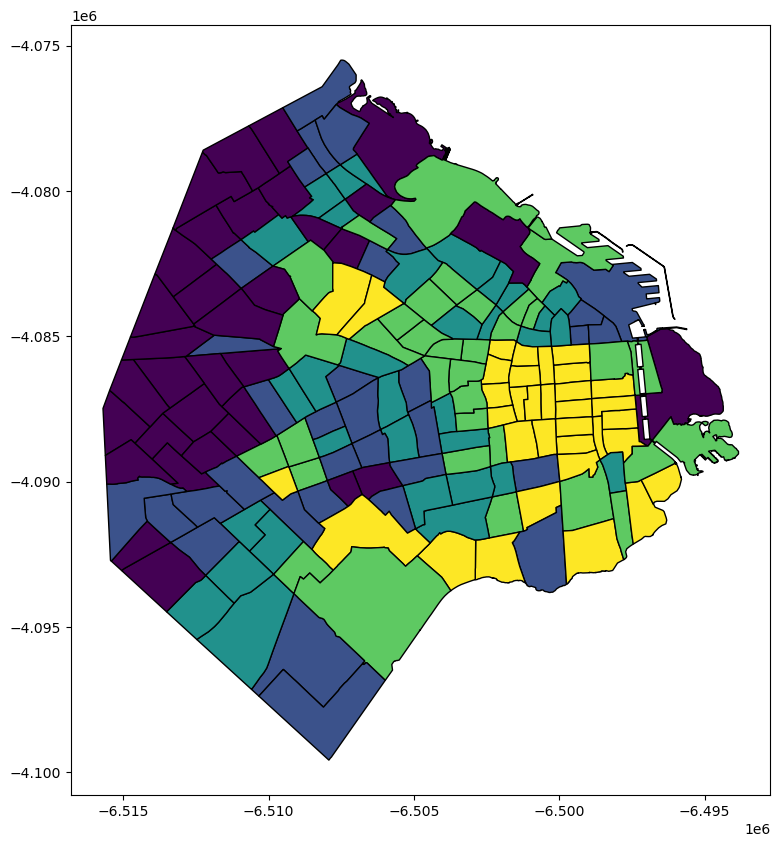

In [23]:
PROP = rosetta[["RADIO","PROP"]]
PROPM = pd.merge(PROP,tabla_intermedia,on="RADIO",how="inner")
PROPME = pd.merge(tabla_intermedia,PROPM,on="RADIO",how="inner")
PROPME.rename(columns={"circuito_x":"circuito"},inplace=True)
PROPME = PROPME[["circuito","PROP"]]
PROP_agrupado = PROPME.groupby(['circuito']).mean()
PROP_agrupado.reset_index(inplace=True)
PROP_agrupado = PROP_agrupado.rename(columns = {'index':'circuito'})
PMERG = pd.merge(circuitos_geometria,PROP_agrupado,on="circuito",how="inner")
PMERG.plot(column='PROP', scheme='quantiles', figsize=(10, 10),edgecolor="k")

In [103]:
voto_PROP = pd.merge(voto_circuito2,PMERG,on="circuito",how="inner")
voto_PROP = voto_PROP.drop(["geometry"], axis=1)
voto_PROP = voto_PROP.sort_values(by=['Porcentaje PP2'])
voto_PROP

circuito  Porcentaje PP2      PROP
143     0144        9.752255  1.588811
20      0021        9.859155  1.838738
137     0138       10.998035  1.859547
115     0116       11.811303  1.929588
114     0115       12.044514  1.901905
..       ...             ...       ...
75      0076       41.719370  1.739882
43      0044       48.367030  1.871951
44      0045       50.079898  1.942559
42      0043       53.555067  1.773187
5       0006       54.588898  1.794961

[167 rows x 3 columns]

In [104]:
voto_PR = pd.merge(voto_circuito2,PROPME,on="circuito",how="inner")
voto_PR = (voto_PR.groupby(["circuito","PROP"])
    .size()
    .to_frame(name="count")
      )
voto_PR = voto_PR.unstack()

count                                               
PROP           0        1       2       3      4      5       6
circuito                                                       
0001       200.0   4701.0   918.0  3808.0  338.0  281.0   219.0
0002       506.0   4280.0   484.0  3912.0  323.0  204.0   279.0
0003        62.0   2274.0   269.0   845.0   85.0   12.0    37.0
0004         7.0    709.0   135.0   539.0   64.0   12.0     7.0
0005      1602.0  13876.0  5681.0  6459.0  717.0  115.0   448.0
...          ...      ...     ...     ...    ...    ...     ...
0163       277.0   7293.0   489.0  4162.0  840.0  295.0   725.0
0164       701.0   6489.0   818.0  3925.0  444.0  272.0  1031.0
0165       229.0  12644.0  1271.0  5522.0  950.0  295.0   825.0
0166       258.0  11678.0   874.0  3496.0  792.0   70.0   321.0
0167       190.0   9396.0   657.0  2893.0  462.0  139.0   175.0

[167 rows x 7 columns]

In [106]:
voto_PR = pd.merge(voto_PR,voto_circuito2,on="circuito",how="inner")
voto_PR

circuito  (count, 0)  (count, 1)  (count, 2)  (count, 3)  (count, 4)  \
0       0001       200.0      4701.0       918.0      3808.0       338.0   
1       0002       506.0      4280.0       484.0      3912.0       323.0   
2       0003        62.0      2274.0       269.0       845.0        85.0   
3       0004         7.0       709.0       135.0       539.0        64.0   
4       0005      1602.0     13876.0      5681.0      6459.0       717.0   
..       ...         ...         ...         ...         ...         ...   
162     0163       277.0      7293.0       489.0      4162.0       840.0   
163     0164       701.0      6489.0       818.0      3925.0       444.0   
164     0165       229.0     12644.0      1271.0      5522.0       950.0   
165     0166       258.0     11678.0       874.0      3496.0       792.0   
166     0167       190.0      9396.0       657.0      2893.0       462.0   

     (count, 5)  (count, 6)  Porcentaje PP2_x  Porcentaje PP2_y  
0         281.0       219.0         25.951855         25.951855  
1         204.0       279.0         25.397965         25.397965  
2          12.0        37.0         31.351351         31.351351  
3          12.0         7.0         28.916602         28.916602  
4         115.0       448.0         23.229672         23.229672  
..          ...         ...               ...               ...  
162       295.0       725.0         20.777798         20.777798  
163       272.0      1031.0         18.520324         18.520324  
164       295.0       825.0         20.784336         20.784336  
165        70.0       321.0         18.365742         18.365742  
166       139.0       175.0         18.399855         18.399855  

[167 rows x 10 columns]

In [109]:
voto_PR.rename(columns={list(voto_PR)[1]:'0'}, inplace=True)
voto_PR.rename(columns={list(voto_PR)[2]:'1'}, inplace=True)
voto_PR.rename(columns={list(voto_PR)[3]:'2'}, inplace=True)
voto_PR.rename(columns={list(voto_PR)[4]:'3'}, inplace=True)
voto_PR.rename(columns={list(voto_PR)[5]:'4'}, inplace=True)
voto_PR.rename(columns={list(voto_PR)[6]:'5'}, inplace=True)
voto_PR.rename(columns={list(voto_PR)[7]:'6'}, inplace=True)
voto_PR.rename(columns={list(voto_PR)[8]:'Porcentaje PP2'}, inplace=True)

In [111]:
voto_PR["Total"] = voto_PR["0"] + voto_PR["1"] + voto_PR["2"] + voto_PR["3"] + voto_PR["4"] + voto_PR["5"] + voto_PR["6"]

voto_PR["p0"] = voto_PR["0"] / voto_PR["Total"] * 100
voto_PR["p1"] = voto_PR["1"] / voto_PR["Total"] * 100
voto_PR["p2"] = voto_PR["2"] / voto_PR["Total"] * 100
voto_PR["p3"] = voto_PR["3"] / voto_PR["Total"] * 100
voto_PR["p4"] = voto_PR["4"] / voto_PR["Total"] * 100
voto_PR["p5"] = voto_PR["5"] / voto_PR["Total"] * 100
voto_PR["p6"] = voto_PR["6"] / voto_PR["Total"] * 100

In [113]:
voto_PR = voto_PR.drop(["0","1","2","3","4","5","6"], axis =1)
voto_PR = voto_PR.sort_values(by=['Porcentaje PP2']) 
voto_PR

circuito  Porcentaje PP2  Porcentaje PP2_y    Total        p0         p1  \
143     0144        9.752255          9.752255   8884.0  3.286808  71.488068   
20      0021        9.859155          9.859155  13568.0  5.999410  57.724057   
137     0138       10.998035         10.998035  30786.0  1.273306  58.900149   
115     0116       11.811303         11.811303  21644.0  0.965626  52.541120   
114     0115       12.044514         12.044514  13069.0  1.997092  54.174000   
..       ...             ...               ...      ...       ...        ...   
75      0076       41.719370         41.719370  16900.0  0.923077  63.609467   
43      0044       48.367030         48.367030   9676.0  0.485738  56.583299   
44      0045       50.079898         50.079898   7956.0  5.957768  54.650578   
42      0043       53.555067         53.555067  15127.0  9.506181  50.201626   
5       0006       54.588898         54.588898  18972.0  5.086443  57.964369   

            p2         p3        p4        p5        p6  
143   1.384511  16.625394  2.735254  3.072940  1.407024  
20    5.395047  18.536262  2.889151  8.542158  0.913915  
137   5.216657  27.389073  2.773988  3.322939  1.123887  
115  10.621881  29.393827  3.354278  1.164295  1.958972  
114   7.827684  28.709159  4.078353  1.362002  1.851710  
..         ...        ...       ...       ...       ...  
75    6.656805  22.473373  3.272189  1.834320  1.230769  
43    5.828855  32.213725  3.069450  0.878462  0.940471  
44    2.048768  25.854701  5.065359  0.854701  5.568125  
42    4.224235  29.953064  3.457394  0.965162  1.692338  
5     5.302551  22.870546  2.566941  5.207674  1.001476  

[167 rows x 11 columns]

##### Propietarios/ Vivienda y-o Terreno

<AxesSubplot:>

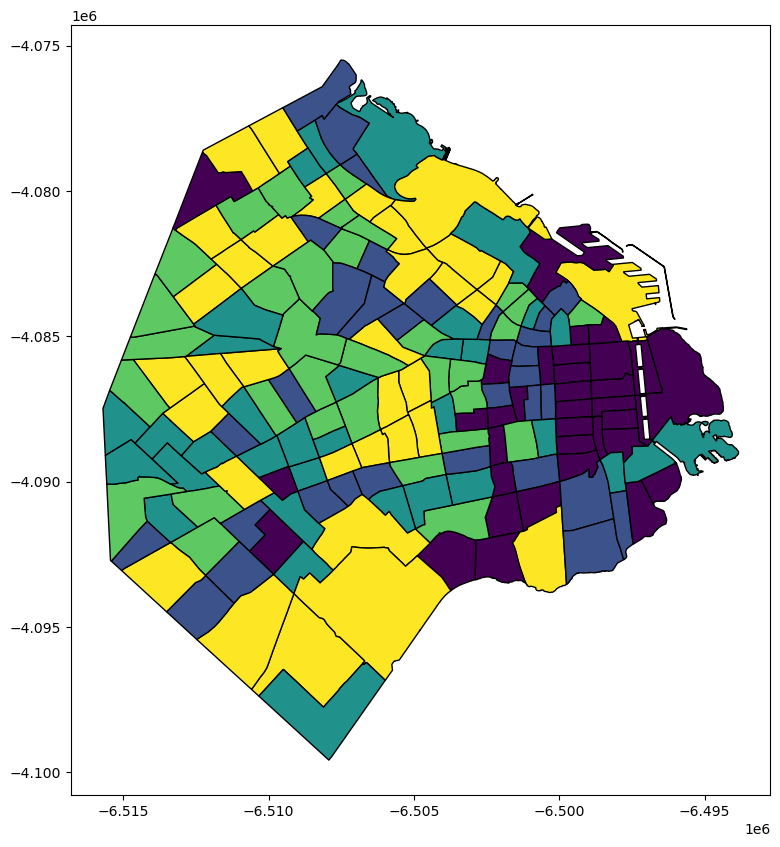

In [24]:
PROP_1 = PROPME.loc[PROPME["PROP"].isin([1,2])]
PROP_1 = (PROP_1[["circuito", "PROP"]]
.groupby(["circuito"])
.count()
)
PROP_1.reset_index(inplace=True)
PROP_1 = PROP_1.rename(columns = {'index':'circuito'})
PROP_1 = pd.merge(circuitos_geometria,PROP_1,on="circuito",how="inner")
PROP_1.plot(column="PROP", scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Propietarios/ Inquilinos-Préstamo-Por Trabajo-Otra Situación

<AxesSubplot:>

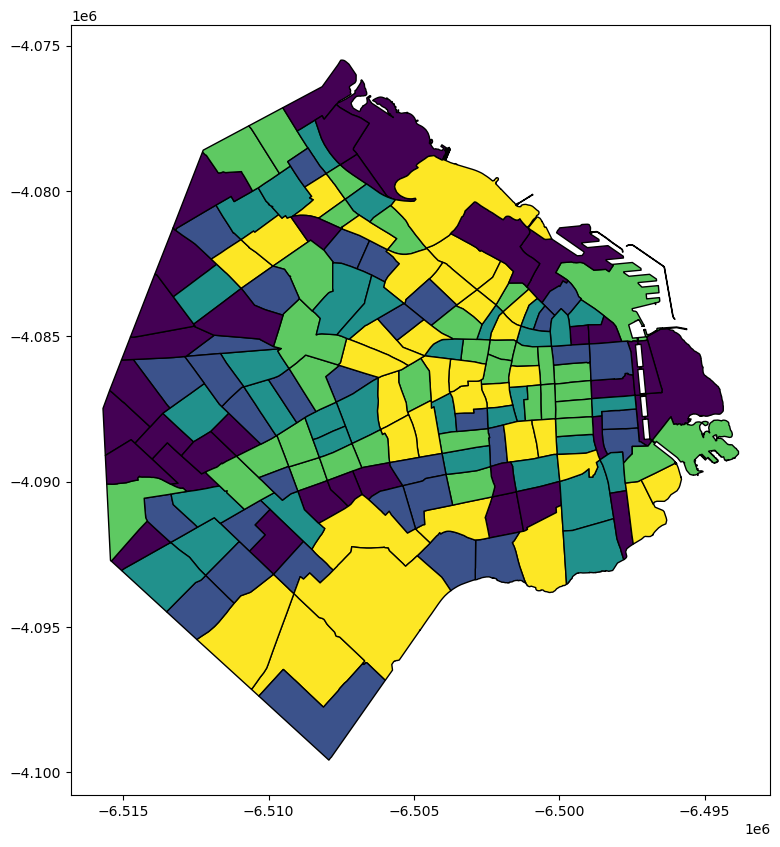

In [25]:
PROP_3 = PROPME.loc[PROPME["PROP"].isin([3, 4, 5, 6])]
PROP_3 = (PROP_3[["circuito", "PROP"]]
.groupby(["circuito"])
.count()
)
PROP_3.reset_index(inplace=True)
PROP_3 = PROP_3.rename(columns = {'index':'circuito'})
PROP_3 = pd.merge(circuitos_geometria,PROP_3,on="circuito",how="inner")
PROP_3.plot(column="PROP", scheme='quantiles', figsize=(10, 10),edgecolor="k")

### NIVEL EDUCATIVO

##### Total Nivel Educativo/Promedio

<AxesSubplot:>

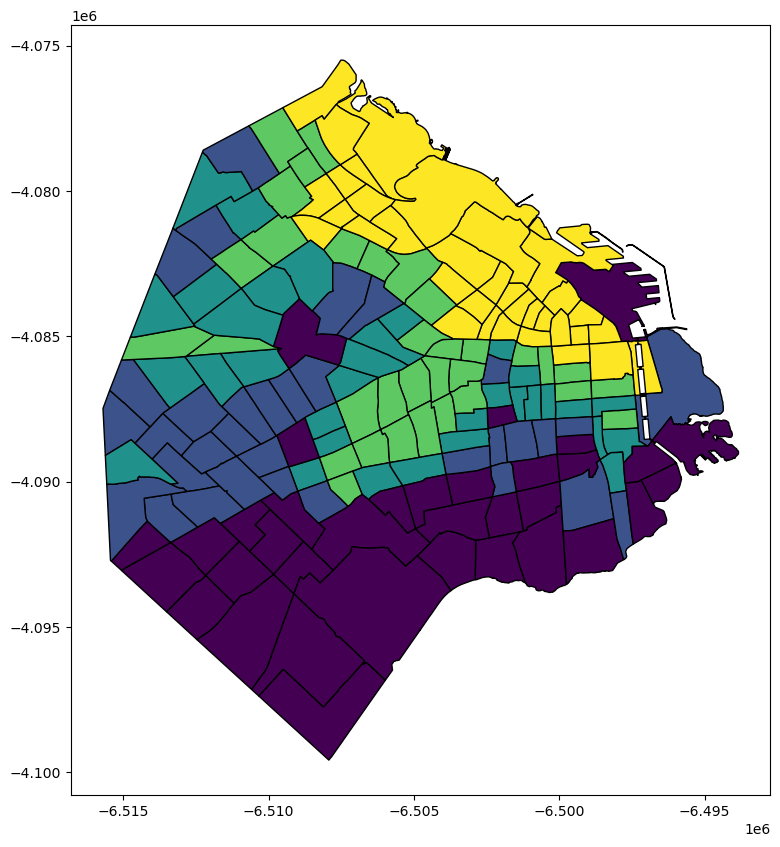

In [89]:
NIVELE = rosetta[["RADIO","P_NIVELED"]]
NIVELEM = pd.merge(NIVELE,tabla_intermedia,on="RADIO",how="inner")
NIVELEME = pd.merge(tabla_intermedia,NIVELEM,on="RADIO",how="inner")
NIVELEME.rename(columns={"circuito_x":"circuito"},inplace=True)
NIVELEME = NIVELEME[["circuito","P_NIVELED"]]
ED_agrupado = NIVELEME.groupby(['circuito']).mean()
ED_agrupado.reset_index(inplace=True)
ED_agrupado = ED_agrupado.rename(columns = {'index':'circuito'})
EDMERG = pd.merge(circuitos_geometria,ED_agrupado,on="circuito",how="inner")
EDMERG.plot(column='P_NIVELED', scheme='quantiles', figsize=(10, 10),edgecolor="k")

In [88]:
voto_ED = pd.merge(voto_circuito2,EDMERG,on="circuito",how="inner")
voto_ED = voto_ED.drop(["geometry"], axis=1)
voto_ED = voto_ED.sort_values(by=['Porcentaje PP2'])
voto_ED

circuito      Porcentaje PP2  P_NIVELED
137     0138   10.99803536345776   5.027220
115     0116  11.811302908489004   4.236186
114     0115  12.044514477053378   4.134899
142     0143  12.078005115089514   5.201809
154     0155  12.137507201843672   4.957039
..       ...                 ...        ...
44      0045   50.07989773090444   3.597536
42      0043  53.555066886567715   3.992927
5       0006   54.58889761717727   5.183639
143     0144    9.75225547758843   5.076430
20      0021   9.859154929577464   5.370357

[167 rows x 3 columns]

In [29]:
voto_NE = pd.merge(voto_circuito2,NIVELEME,on="circuito",how="inner")
voto_NE = (voto_NE.groupby(["circuito","P_NIVELED"])
    .size()
    .to_frame(name="count")
      )
voto_NE = voto_NE.unstack()
#voto_NE.plot

voto_NE = pd.merge(voto_NE,voto_circuito2,on="circuito",how="inner")
voto_NE.rename(columns={list(voto_NE)[1]:'0'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[2]:'1'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[3]:'2'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[4]:'3'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[5]:'4'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[6]:'5'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[7]:'6'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[8]:'7'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[9]:'8'}, inplace=True)
voto_NE.rename(columns={list(voto_NE)[10]:'9'}, inplace=True)

C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\454176495.py:9: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  voto_NE = pd.merge(voto_NE,voto_circuito2,on="circuito",how="inner")


In [30]:
voto_NE["Total"] = voto_NE["0"] + voto_NE["1"] + voto_NE["2"] + voto_NE["3"] + voto_NE["4"] + voto_NE["5"] + voto_NE["6"] + voto_NE["7"] + voto_NE["8"] + voto_NE["9"]

voto_NE["p0"] = voto_NE["0"] / voto_NE["Total"] * 100
voto_NE["p1"] = voto_NE["1"] / voto_NE["Total"] * 100
voto_NE["p2"] = voto_NE["2"] / voto_NE["Total"] * 100
voto_NE["p3"] = voto_NE["3"] / voto_NE["Total"] * 100
voto_NE["p4"] = voto_NE["4"] / voto_NE["Total"] * 100
voto_NE["p5"] = voto_NE["5"] / voto_NE["Total"] * 100
voto_NE["p6"] = voto_NE["6"] / voto_NE["Total"] * 100
voto_NE["p7"] = voto_NE["7"] / voto_NE["Total"] * 100
voto_NE["p8"] = voto_NE["8"] / voto_NE["Total"] * 100
voto_NE["p9"] = voto_NE["9"] / voto_NE["Total"] * 100

voto_NE = voto_NE.drop(["0","1","2","3","4","5","6","7","8","9"], axis =1)
voto_NE = voto_NE.sort_values(by=['Porcentaje PP2']) 

In [31]:
voto_NE

circuito      Porcentaje PP2  Total        p0        p1         p2  \
137     0138   10.99803536345776  30786  3.803677  3.212499  13.645813   
115     0116  11.811302908489004  21644  4.116614  3.728516  21.544077   
114     0115  12.044514477053378  13069  4.323208  3.512128  22.365904   
142     0143  12.078005115089514  18686  3.184202  3.205608  11.864497   
154     0155  12.137507201843672  25209  3.740728  2.959261  14.879606   
..       ...                 ...    ...       ...       ...        ...   
44      0045   50.07989773090444   7956  5.178482  3.393665  31.271996   
42      0043  53.555066886567715  15127  5.843855  3.259073  24.816553   
5       0006   54.58889761717727  18972  3.283787  2.508961  12.655492   
143     0144    9.75225547758843   8884  3.151733  3.298064  13.890140   
20      0021   9.859154929577464  13568  2.704894  2.299528  11.261792   

           p3         p4        p5         p6         p7        p8        p9  
137  0.097447  25.216007  0.172156  12.060677  36.740726  4.807380  0.243617  
115  0.157087  35.996119  0.166328  11.074663  21.086675  1.709481  0.420440  
114  0.114775  38.105440  0.091820  10.329788  19.420002  1.530339  0.206596  
142  0.080274  24.360484  0.171251  11.639730  39.280745  6.015199  0.198009  
154  0.103138  26.827720  0.190408  10.662859  34.892300  5.505970  0.238010  
..        ...        ...       ...        ...        ...       ...       ...  
44   0.062846  40.057818  0.263952   7.642031  11.173957  0.590749  0.364505  
42   0.165267  36.101011  0.383420   8.977325  18.305018  1.751834  0.396642  
5    0.110689  25.321526  0.253004   9.682690  40.111744  5.866540  0.205566  
143  0.202611  24.752364  0.157587  11.413778  37.640702  5.245385  0.247636  
20   0.213738  23.393278  0.309552   9.979363  42.320165  7.326061  0.191627  

[167 rows x 13 columns]

##### Nivel Educativo/ Primario

In [32]:
NIVELE = rosetta[["RADIO","P_NIVELED"]]
NIVELEME = pd.merge(NIVELE,tabla_intermedia,on="RADIO",how="inner")
NIVELEME = NIVELEME[["circuito","P_NIVELED"]]
ED_2 = NIVELEME[NIVELEME["P_NIVELED"]==2]
ED_2 = (ED_2[["circuito", "P_NIVELED"]]
.groupby(["circuito"])
.count()
)
ED_2.reset_index(inplace=True)
ED_2 = ED_2.rename(columns = {'index':'circuito'})
EDM_2 = pd.merge(circuitos_geometria,ED_2,on="circuito",how="inner")
#EDM_2.plot(column="P_NIVELED", scheme='quantiles', figsize=(10, 10),edgecolor="k")


##### Nivel Educativo/ Bachiller-Secundario-Polimodal

<AxesSubplot:>

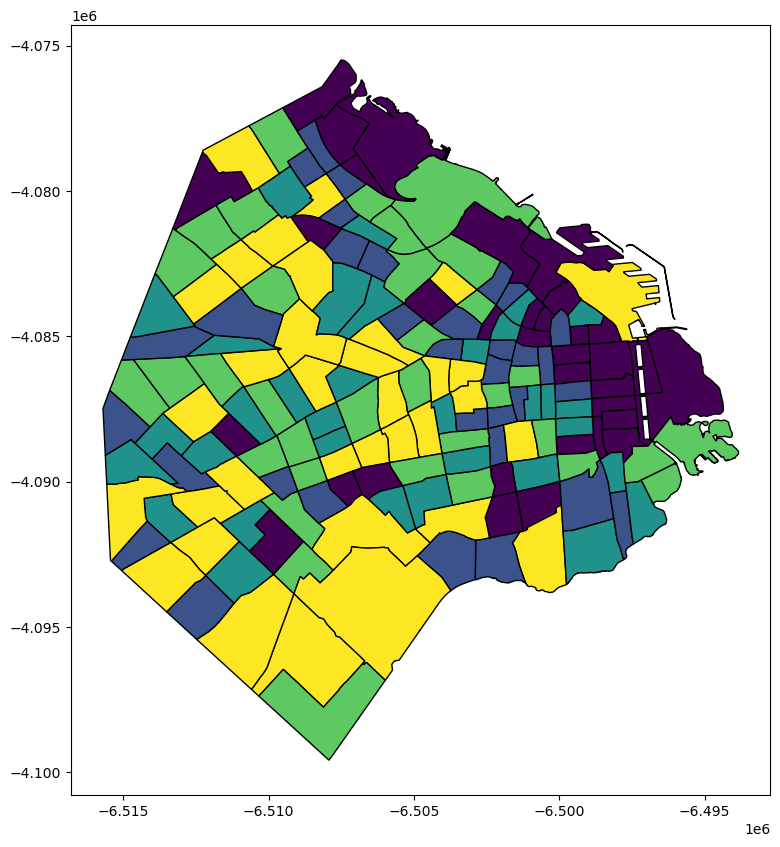

In [33]:
NIVELE = rosetta[["RADIO","P_NIVELED"]]
NIVELEME = pd.merge(NIVELE,tabla_intermedia,on="RADIO",how="inner")
NIVELEME = NIVELEME[["circuito","P_NIVELED"]]
ED_3 = NIVELEME.loc[NIVELEME["P_NIVELED"].isin([3,4,5])]
ED_3 = (ED_3[["circuito", "P_NIVELED"]]
.groupby(["circuito"])
.count()
)
ED_3.reset_index(inplace=True)
ED_3 = ED_3.rename(columns = {'index':'circuito'})
EDM_3 = pd.merge(circuitos_geometria,ED_3,on="circuito",how="inner")
EDM_3.plot(column="P_NIVELED", scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Nivel Educativo/ Universitario-PostUniversitario

<AxesSubplot:>

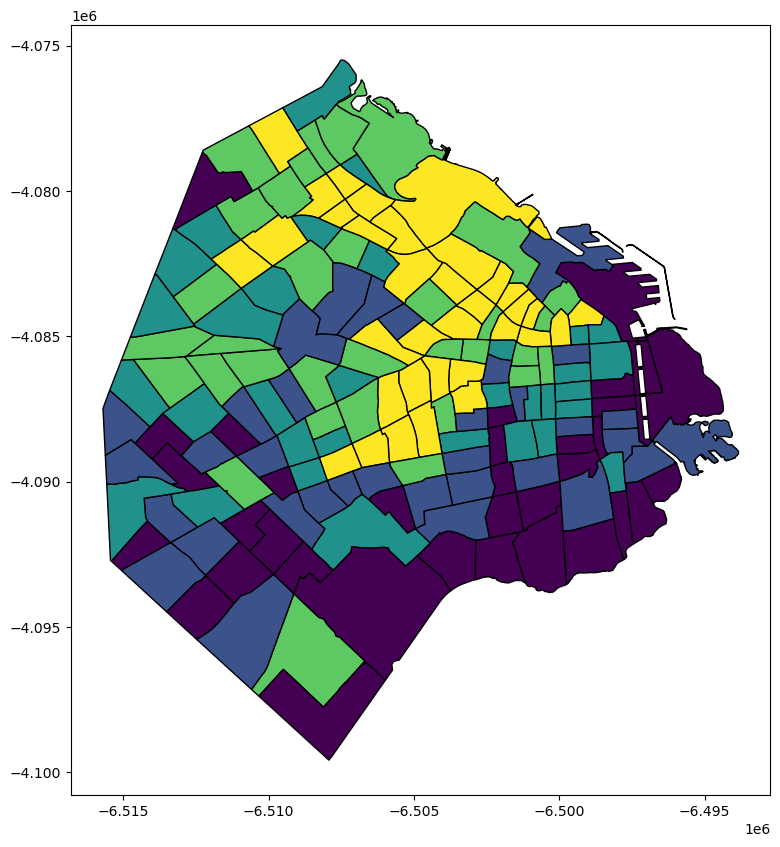

In [34]:
NIVELE = rosetta[["RADIO","P_NIVELED"]]
NIVELEME = pd.merge(NIVELE,tabla_intermedia,on="RADIO",how="inner")
NIVELEME = NIVELEME[["circuito","P_NIVELED"]]
ED_7 = NIVELEME.loc[NIVELEME["P_NIVELED"].isin([7,8])]
ED_7 = (ED_7[["circuito", "P_NIVELED"]]
.groupby(["circuito"])
.count()
)
ED_7.reset_index(inplace=True)
ED_7 = ED_7.rename(columns = {'index':'circuito'})
EDM_7 = pd.merge(circuitos_geometria,ED_7,on="circuito",how="inner")
EDM_7.plot(column="P_NIVELED", scheme='quantiles', figsize=(10, 10),edgecolor="k")

### SEXO

##### Total Sexo/Promedio

In [35]:
SEXO = rosetta[["RADIO","SEXO"]]
pd.unique(SEXO['SEXO'])

array([2, 1], dtype=int64)

<AxesSubplot:>

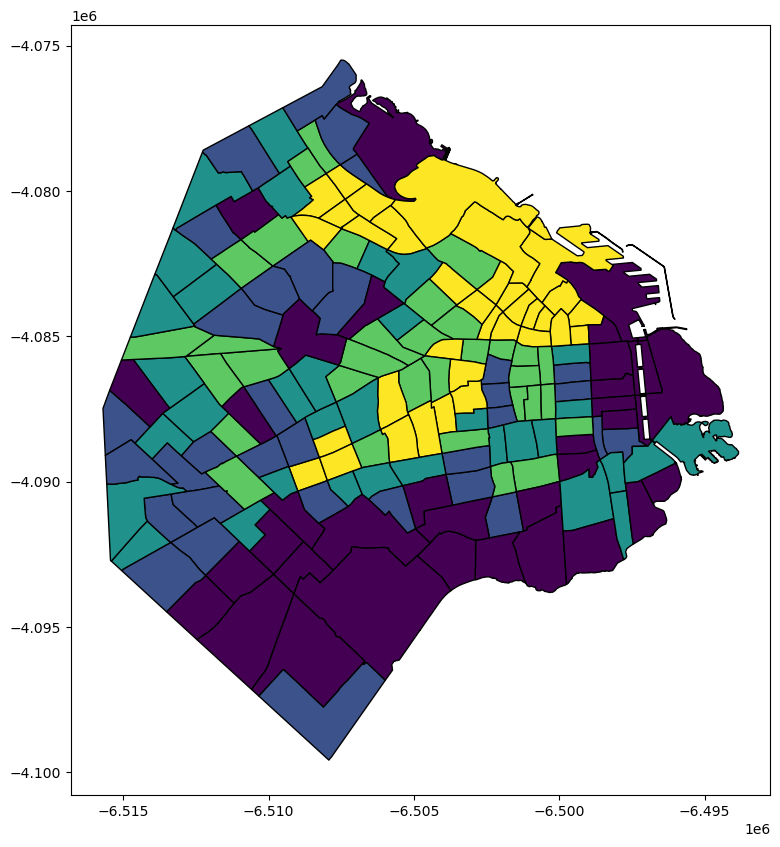

In [87]:
SEXO = rosetta[["RADIO","SEXO"]]
SEXOM = pd.merge(SEXO,tabla_intermedia,on="RADIO",how="inner")
SEXOME = pd.merge(tabla_intermedia,SEXOM,on="RADIO",how="inner")
SEXOME.rename(columns={"circuito_x":"circuito"},inplace=True)
SEXOME = SEXOME[["circuito","SEXO"]]
SEX_agrupado = SEXOME.groupby(['circuito']).mean()
SEX_agrupado.reset_index(inplace=True)
SEX_agrupado = SEX_agrupado.rename(columns = {'index':'circuito'})
SEXMERG = pd.merge(circuitos_geometria,SEX_agrupado,on="circuito",how="inner")
SEXMERG.plot(column='SEXO', scheme='quantiles', figsize=(10, 10),edgecolor="k")

In [37]:

# Para asociar porcentaje del candidato con la media de Sexo por circuito
voto_sexo = pd.merge(voto_circuito2,SEXMERG,on="circuito",how="inner")
voto_sexo = voto_sexo.drop(["geometry"], axis=1)
voto_sexo = voto_sexo.sort_values(by=['Porcentaje PP2']).head(10)
voto_sexo

circuito      Porcentaje PP2      SEXO
137     0138   10.99803536345776  1.560742
115     0116  11.811302908489004  1.537840
114     0115  12.044514477053378  1.540133
142     0143  12.078005115089514  1.568233
154     0155  12.137507201843672  1.537229
112     0113  12.455767869780608  1.526294
102     0103  12.765169059749883  1.527461
113     0114  12.960473245496102  1.534218
141     0142  13.462481608631682  1.557474
157     0158  13.719412724306688  1.550013

In [38]:
SEXOMERG = pd.merge(voto_circuito,SEXOME,on="circuito",how="inner")
SME = (SEXOMERG.groupby(["circuito","SEXO"])
    .size()
    .to_frame(name="count")
      )
SME = SME.unstack()
#SME.plot()

In [39]:
SMEM = pd.merge(SME,voto_circuito2,on="circuito",how="inner")
SMEM.rename(columns={list(SMEM)[1]:'1'}, inplace=True)
SMEM.rename(columns={list(SMEM)[2]:'2'}, inplace=True)

C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\1006700748.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  SMEM = pd.merge(SME,voto_circuito2,on="circuito",how="inner")


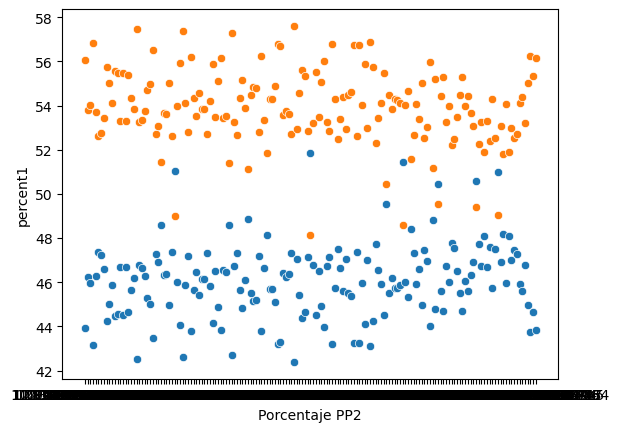

In [40]:
SMEM['Total'] = SMEM['1'] + SMEM['2']
SMEM["percent1"] = SMEM ["1"] / SMEM["Total"] * 100
SMEM["percent2"] = SMEM ["2"] / SMEM["Total"] * 100
SMEM1 = SMEM.sort_values(by=['Porcentaje PP2']) 
ax=sns.scatterplot(x="Porcentaje PP2", y="percent1", data=SMEM1);
ax2=sns.scatterplot(x="Porcentaje PP2", y="percent2", data=SMEM1);

#Estilizar gráfico

In [86]:
SMEM1

circuito      1      2      Porcentaje PP2  Total   percent1   percent2
137     0138  13523  17263   10.99803536345776  30786  43.925810  56.074190
115     0116  10003  11641  11.811302908489004  21644  46.216041  53.783959
114     0115   6010   7059  12.044514477053378  13069  45.986686  54.013314
142     0143   8068  10618  12.078005115089514  18686  43.176710  56.823290
154     0155  11666  13543  12.137507201843672  25209  46.277123  53.722877
..       ...    ...    ...                 ...    ...        ...        ...
44      0045   3721   4235   50.07989773090444   7956  46.769734  53.230266
42      0043   6802   8325  53.555066886567715  15127  44.965955  55.034045
5       0006   8300  10672   54.58889761717727  18972  43.748682  56.251318
143     0144   3968   4916    9.75225547758843   8884  44.664566  55.335434
20      0021   5948   7620   9.859154929577464  13568  43.838443  56.161557

[167 rows x 7 columns]

##### Sexo/ Masculino

In [41]:
SEXO_HOMBRES = SEXOME[SEXOME["SEXO"]==1]
SEX_HOM = (SEXO_HOMBRES[['circuito', 'SEXO']]
.groupby(['circuito'])
.count()
)
SEX_HOM.reset_index(inplace=True)
SEX_HOM = SEX_HOM.rename(columns = {'index':'circuito'})
SEX_HOM = pd.merge(circuitos_geometria,SEX_HOM,on="circuito",how="inner")
#SEX_HOM.plot(column='SEXO', scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Sexo/ Femenino

In [42]:
SEXO_FEMENINO = SEXOME[SEXOME["SEXO"]==2]
SEX_FEM = (SEXO_FEMENINO[['circuito', 'SEXO']]
.groupby(['circuito'])
.count()
)
SEX_FEM.reset_index(inplace=True)
SEX_FEM = SEX_FEM.rename(columns = {'index':'circuito'})
SEX_FEM = pd.merge(circuitos_geometria,SEX_FEM,on="circuito",how="inner")
#SEX_FEM.plot(column='SEXO', scheme='quantiles', figsize=(10, 10),edgecolor="k")

### EDAD

#### Edad Agrupada 

##### Edad Agrupada entre 15 Y 64 años

##### Edad Agrupada +65

#### Edad Intervalar entre 16 Y 25

#### Edad Intervalar entre 26 Y 35

#### Edad Intervalar entre 36 Y 50

#### Edad Intervalar entre 51 Y 70

#### Edad Intervalar menores de 16 años

### CONDICIÓN DE ACTIVIDAD

##### Total Condición de Actividad/ Promedio

In [43]:
CONDA = rosetta[["RADIO","CONDACT"]]
pd.unique(CONDA["CONDACT"])

array([1, 3, 2, 0], dtype=int64)

<AxesSubplot:>

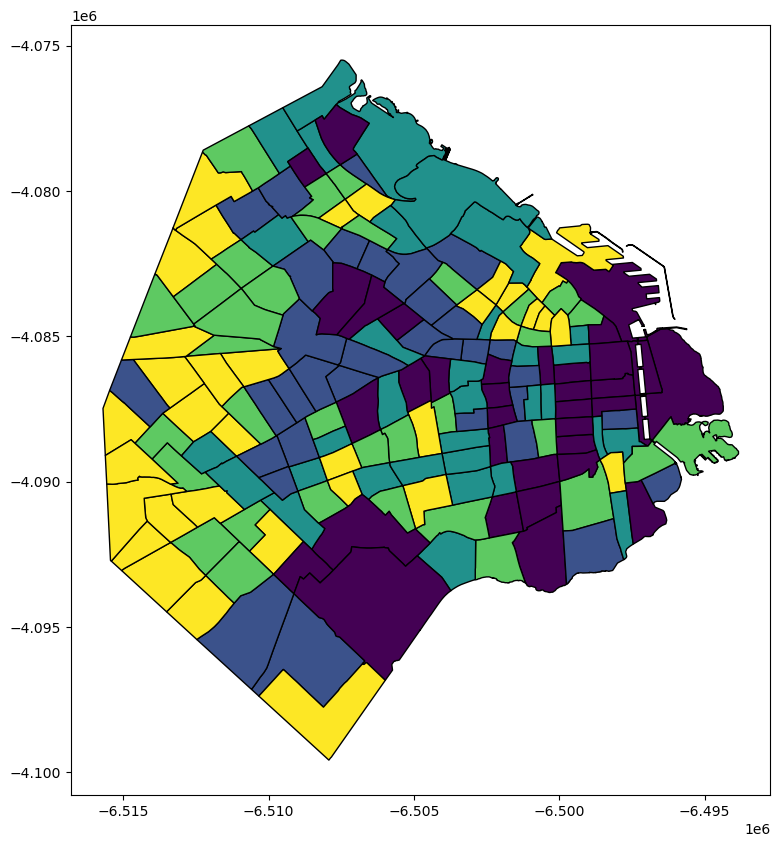

In [44]:
CONDA = rosetta[["RADIO","CONDACT"]]
CONDACT = pd.merge(CONDA,tabla_intermedia,on="RADIO",how="inner")
CONDACT = CONDACT[["circuito","CONDACT"]]
CONDACT_agrupado = CONDACT.groupby(['circuito']).mean()
CONDACT_agrupado.reset_index(inplace=True)
CONDACT_agrupado = CONDACT_agrupado.rename(columns = {'index':'circuito'})
CONDACTMERG = pd.merge(circuitos_geometria,CONDACT_agrupado,on="circuito",how="inner")
CONDACTMERG.plot(column='CONDACT', scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Condición de Actividad/ Menor de 14

<AxesSubplot:>

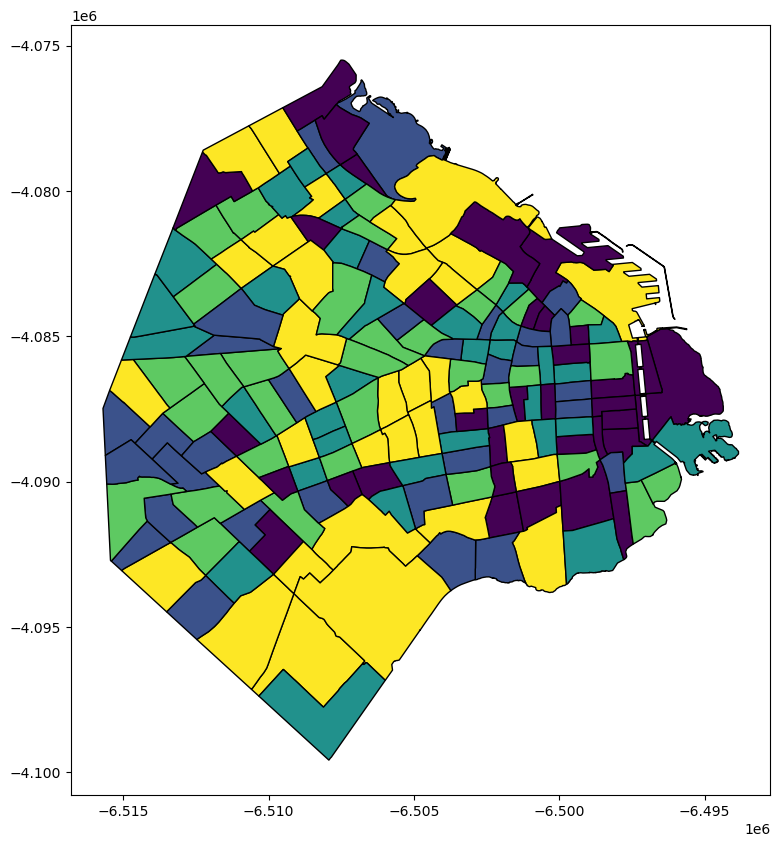

In [45]:
CONDA = rosetta[["RADIO","CONDACT"]]
CONDACT = pd.merge(CONDA,tabla_intermedia,on="RADIO",how="inner")
CONDACT = CONDACT[["circuito","CONDACT"]]
CONDACT0 = CONDACT[CONDACT["CONDACT"]==0]
condact0_circuito = (CONDACT0[['circuito', 'CONDACT']]
.groupby(['circuito'])
.count()
)
condact0_circuito.reset_index(inplace=True)
condact0_circuito = condact0_circuito.rename(columns = {'index':'circuito'})
condact0_merge = pd.merge(circuitos_geometria,condact0_circuito,on="circuito",how="inner")
condact0_merge.plot(column='CONDACT', scheme='quantiles', figsize=(10, 10),edgecolor="k")


##### Condición de Actividad/ Ocupada

<AxesSubplot:>

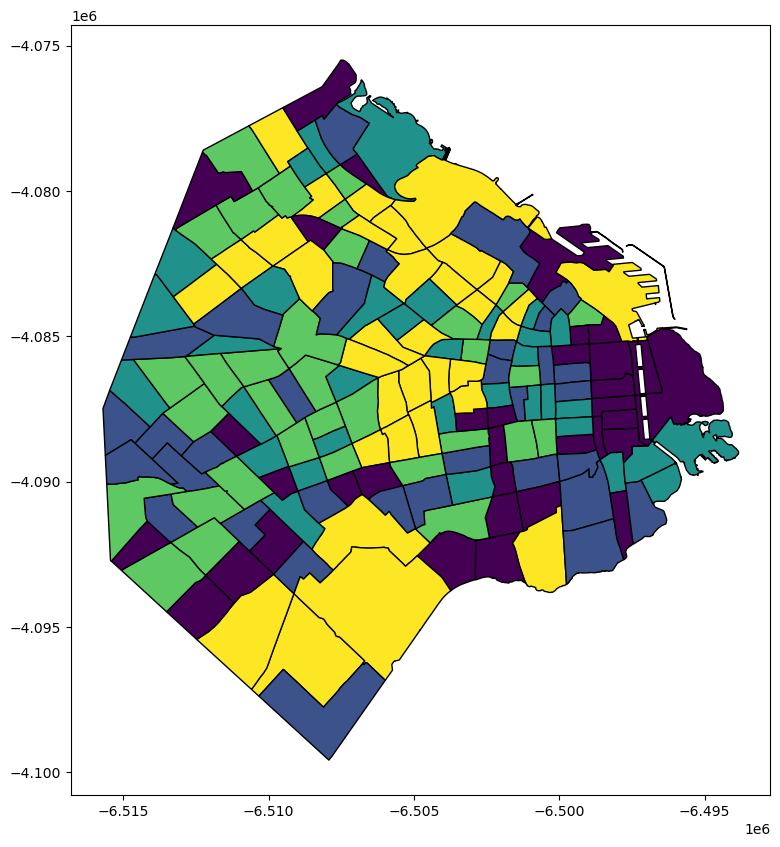

In [46]:
CONDA = rosetta[["RADIO","CONDACT"]]
CONDACT = pd.merge(CONDA,tabla_intermedia,on="RADIO",how="inner")
CONDACT = CONDACT[["circuito","CONDACT"]]
CONDACT1 = CONDACT[CONDACT["CONDACT"]==1]
condact1_circuito = (CONDACT1[['circuito', 'CONDACT']]
.groupby(['circuito'])
.count()
)
condact1_circuito.reset_index(inplace=True)
condact1_circuito = condact1_circuito.rename(columns = {'index':'circuito'})
condact1_merge = pd.merge(circuitos_geometria,condact1_circuito,on="circuito",how="inner")
condact1_merge.plot(column='CONDACT', scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Condición de Actividad/ Desocupada

<AxesSubplot:>

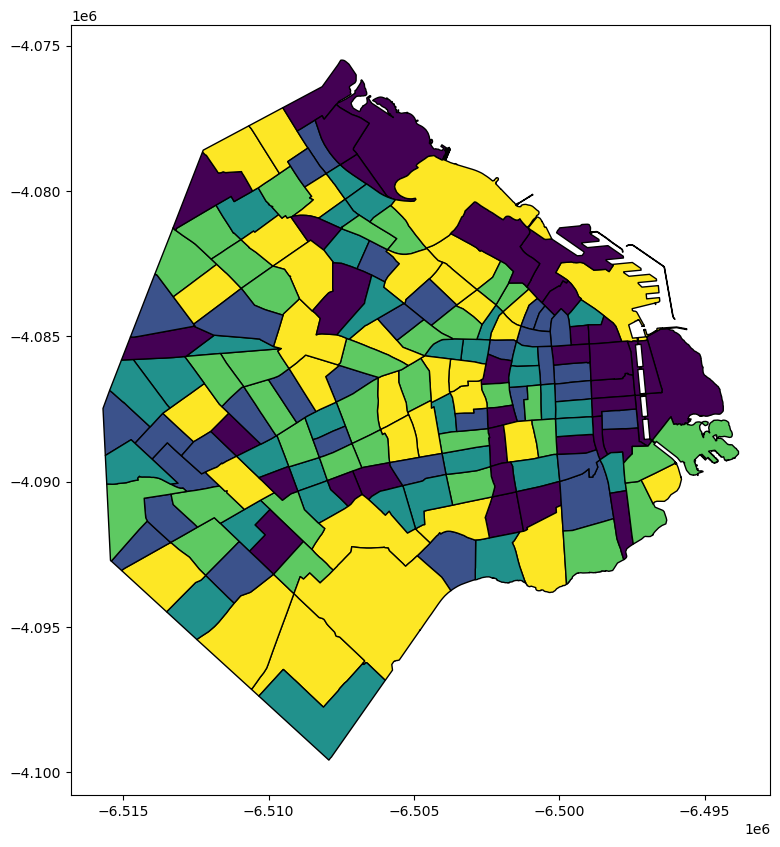

In [47]:
CONDACT2 = CONDACT[CONDACT["CONDACT"]==2]
condact2_circuito = (CONDACT2[['circuito', 'CONDACT']]
.groupby(['circuito'])
.count()
)
condact2_circuito.reset_index(inplace=True)
condact2_circuito = condact2_circuito.rename(columns = {'index':'circuito'})
condact2_merge = pd.merge(circuitos_geometria,condact2_circuito,on="circuito",how="inner")
condact2_merge.plot(column='CONDACT', scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Condición de Actividad/ Económicamente Inactivo

<AxesSubplot:>

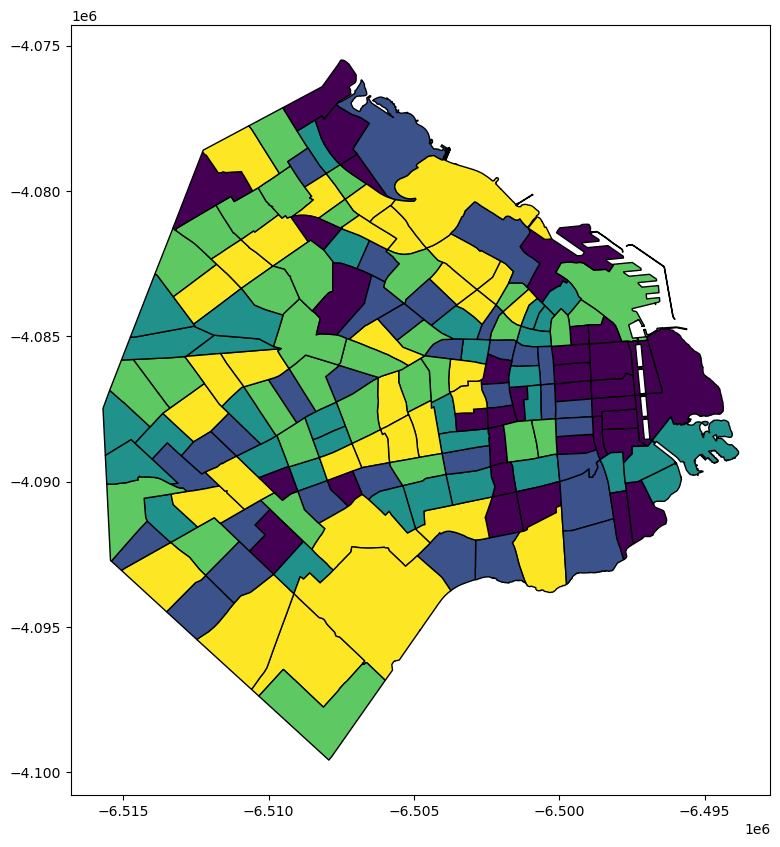

In [48]:
CONDACT3 = CONDACT[CONDACT["CONDACT"]==3]
condact3_circuito = (CONDACT3[['circuito', 'CONDACT']]
.groupby(['circuito'])
.count()
)
condact3_circuito.reset_index(inplace=True)
condact3_circuito = condact3_circuito.rename(columns = {'index':'circuito'})
condact3_merge = pd.merge(circuitos_geometria,condact3_circuito,on="circuito",how="inner")
condact3_merge.plot(column='CONDACT', scheme='quantiles', figsize=(10, 10),edgecolor="k")

### NBI

##### Total NBI/ Porcentaje

In [49]:
ANBI = rosetta[["RADIO","ALGUNBI"]]
pd.unique(ANBI["ALGUNBI"])

array([0, 1, 2], dtype=int64)

<AxesSubplot:>

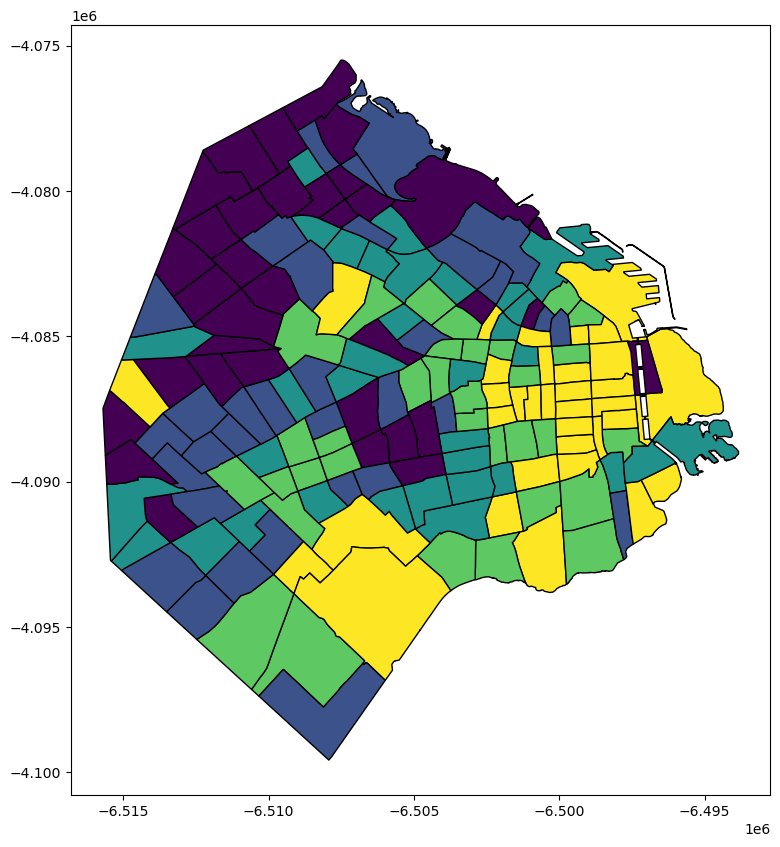

In [50]:
ANBI = rosetta[["RADIO","ALGUNBI"]]
NBI = pd.merge(ANBI,tabla_intermedia,on="RADIO",how="inner")
NBI = NBI[["circuito","ALGUNBI"]]
NBI_agrupado = NBI.groupby(['circuito']).mean()
NBI_agrupado.reset_index(inplace=True)
NBI_agrupado = NBI_agrupado.rename(columns = {'index':'circuito'})
NBIMERG = pd.merge(circuitos_geometria,NBI_agrupado,on="circuito",how="inner")
NBIMERG.plot(column='ALGUNBI', scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### NBI/ No

<AxesSubplot:>

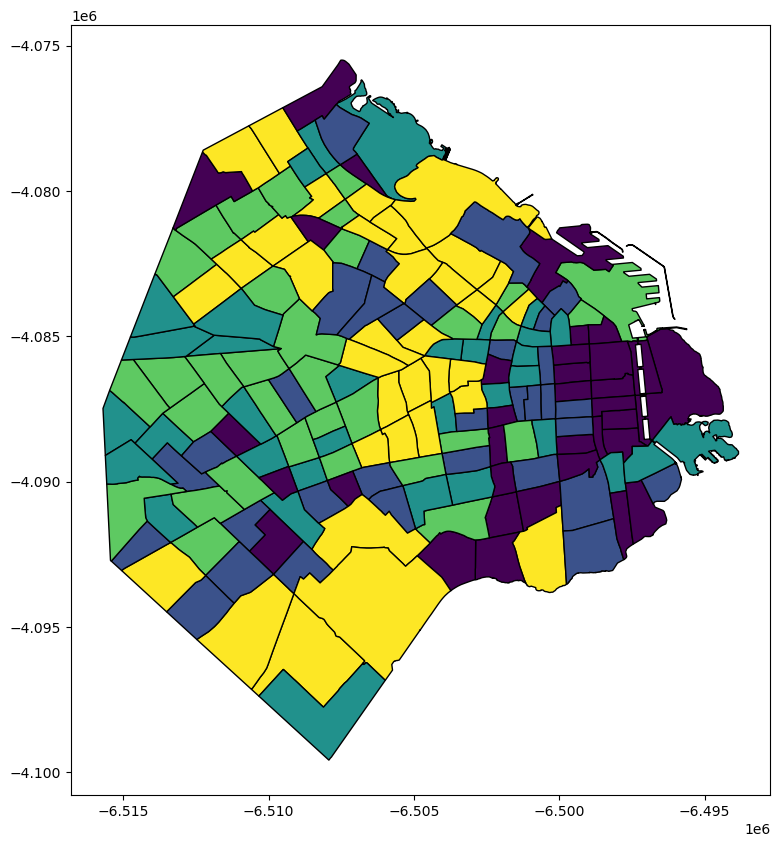

In [51]:
NBI_0 = NBI[NBI["ALGUNBI"]==0]
NBI_0 = (NBI_0[['circuito', 'ALGUNBI']]
.groupby(['circuito'])
.count()
)
NBI_0.reset_index(inplace=True)
NBI_0 = NBI_0.rename(columns = {'index':'circuito'})
NBI_0_merge = pd.merge(circuitos_geometria,NBI_0,on="circuito",how="inner")
NBI_0_merge.plot(column='ALGUNBI', scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### NBI/ Sí

<AxesSubplot:>

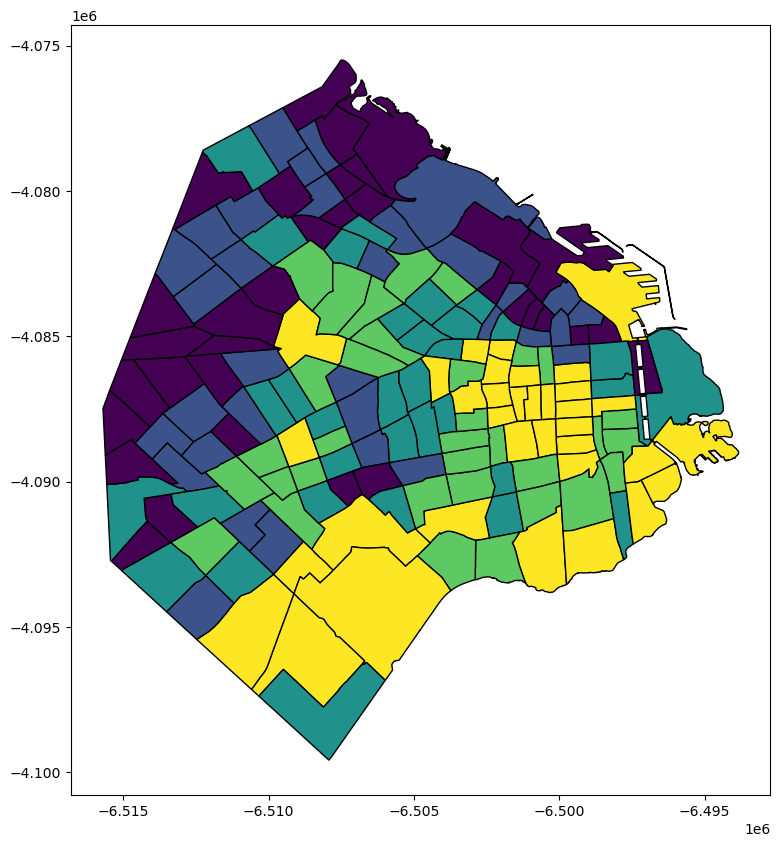

In [52]:
NBI_1 = NBI[NBI["ALGUNBI"]==1]
NBI_1 = (NBI_1[['circuito', 'ALGUNBI']]
.groupby(['circuito'])
.count()
)
NBI_1.reset_index(inplace=True)
NBI_1 = NBI_1.rename(columns = {'index':'circuito'})
NBI_1_merge = pd.merge(circuitos_geometria,NBI_1,on="circuito",how="inner")
NBI_1_merge.plot(column='ALGUNBI', scheme='quantiles', figsize=(10, 10),edgecolor="k")

### CELULAR

##### Total Celular/ Promedio

In [53]:
CELU = rosetta[["RADIO","CELULAR"]]
pd.unique(CELU["CELULAR"])

array([1, 2, 0], dtype=int64)

<AxesSubplot:>

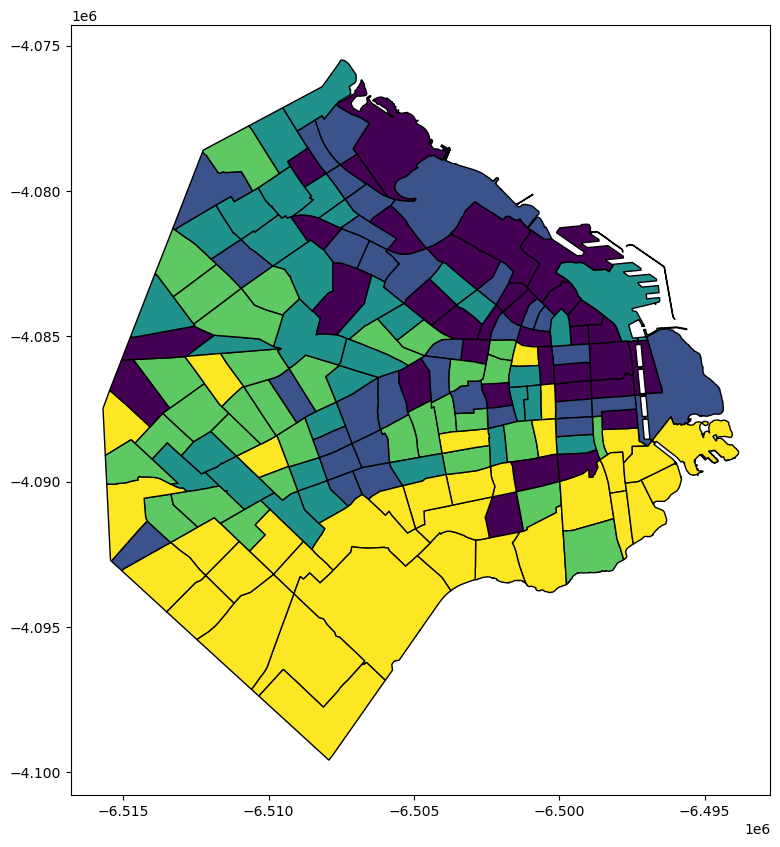

In [54]:
CELU = rosetta[["RADIO","CELULAR"]]
CELULAR = pd.merge(CELU,tabla_intermedia,on="RADIO",how="inner")
CELULAR = CELULAR[["circuito","CELULAR"]]
CELULAR_agrupado = CELULAR.groupby(['circuito']).mean()
CELULAR_agrupado.reset_index(inplace=True)
CELULAR_agrupado = CELULAR_agrupado.rename(columns = {'index':'circuito'})
CELULARMERG = pd.merge(circuitos_geometria,CELULAR_agrupado,on="circuito",how="inner")
CELULARMERG.plot(column='CELULAR', scheme='quantiles', figsize=(10, 10),edgecolor="k")

In [85]:
CEL_DE = CELULAR.groupby(['circuito']).agg(["mean","std"])
CEL_DE = pd.merge(voto_circuito2,CEL_DE,on="circuito",how="inner")
CEL_DE = CEL_DE.sort_values(by=['Porcentaje PP2']).head(10)
CEL_DE

C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\3699851341.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  CEL_DE = pd.merge(voto_circuito2,CEL_DE,on="circuito",how="inner")


circuito      Porcentaje PP2  (CELULAR, mean)  (CELULAR, std)
137     0138   10.99803536345776         1.063503        0.291443
115     0116  11.811302908489004         1.080992        0.306185
114     0115  12.044514477053378         1.058000        0.307547
142     0143  12.078005115089514         1.070534        0.283809
154     0155  12.137507201843672         1.050339        0.295362
112     0113  12.455767869780608         1.078537        0.294967
102     0103  12.765169059749883         1.095462        0.300632
113     0114  12.960473245496102         1.077940        0.303565
141     0142  13.462481608631682         1.048059        0.245204
157     0158  13.719412724306688         1.074998        0.286635

##### Celular/ Sí

<AxesSubplot:>

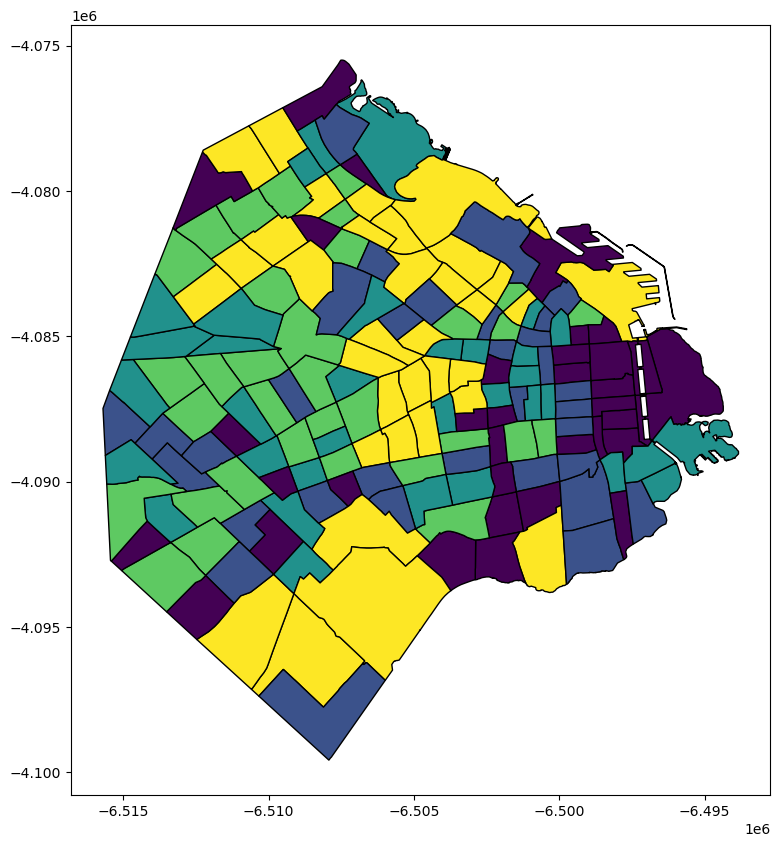

In [55]:
CELULAR_1 = CELULAR[CELULAR["CELULAR"]==1]
CELULAR_1 = (CELULAR_1[['circuito', 'CELULAR']]
.groupby(['circuito'])
.count()
)
CELULAR_1.reset_index(inplace=True)
CELULAR_1 = CELULAR_1.rename(columns = {'index':'circuito'})
CELULAR_1_merge = pd.merge(circuitos_geometria,CELULAR_1,on="circuito",how="inner")
CELULAR_1_merge.plot(column='CELULAR', scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Celular/ No

<AxesSubplot:>

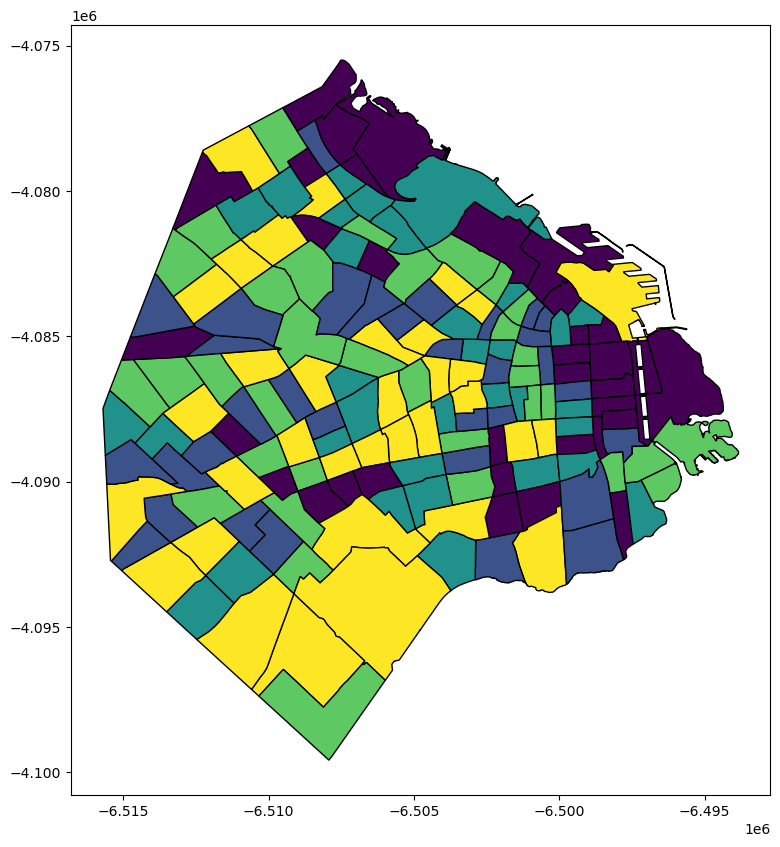

In [56]:
CELULAR_2 = CELULAR[CELULAR["CELULAR"]==2]
CELULAR_2 = (CELULAR_2[['circuito', 'CELULAR']]
.groupby(['circuito'])
.count()
)
CELULAR_2.reset_index(inplace=True)
CELULAR_2 = CELULAR_2.rename(columns = {'index':'circuito'})
CELULAR_2_merge = pd.merge(circuitos_geometria,CELULAR_2,on="circuito",how="inner")
CELULAR_2_merge.plot(column='CELULAR', scheme='quantiles', figsize=(10, 10),edgecolor="k")

### NACIONALIDAD

##### Total Nacionalidad/ Promedio

In [57]:
NAC = rosetta[["RADIO","P_NACDAD"]]
pd.unique(NAC["P_NACDAD"])

array([1, 2], dtype=int64)

In [58]:
NAC = rosetta[["RADIO","P_NACDAD"]]
NACIONALIDAD = pd.merge(NAC,tabla_intermedia,on="RADIO",how="inner")
NACIONALIDAD = NACIONALIDAD[["circuito","P_NACDAD"]]
NACIONALIDAD_agrupado = NACIONALIDAD.groupby(['circuito']).mean()
NACIONALIDAD_agrupado.reset_index(inplace=True)
NACIONALIDAD_agrupado = NACIONALIDAD_agrupado.rename(columns = {'index':'circuito'})
NACIONALIDADMERG = pd.merge(circuitos_geometria,NACIONALIDAD_agrupado,on="circuito",how="inner")
#NACIONALIDADMERG.plot(column='P_NACDAD', scheme='quantiles', figsize=(10, 10),edgecolor="k")

In [59]:
voto_nac = pd.merge(voto_circuito2,NACIONALIDADMERG,on="circuito",how="inner")
voto_nac = voto_nac.drop(["geometry"], axis=1)
voto_nac = voto_nac.sort_values(by=['Porcentaje PP2']).head(10)
voto_nac

circuito      Porcentaje PP2  P_NACDAD
137     0138   10.99803536345776  1.082960
115     0116  11.811302908489004  1.105664
114     0115  12.044514477053378  1.110873
142     0143  12.078005115089514  1.081719
154     0155  12.137507201843672  1.117180
112     0113  12.455767869780608  1.096411
102     0103  12.765169059749883  1.070348
113     0114  12.960473245496102  1.105654
141     0142  13.462481608631682  1.108002
157     0158  13.719412724306688  1.096183

In [84]:
N_DE = NACIONALIDAD.groupby(['circuito']).agg(["mean","std"])
N_DE = pd.merge(voto_circuito2,N_DE,on="circuito",how="inner")
N_DE = N_DE.sort_values(by=['Porcentaje PP2']).head(10)
N_DE

C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\3911641336.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  N_DE = pd.merge(voto_circuito2,N_DE,on="circuito",how="inner")


circuito      Porcentaje PP2  (P_NACDAD, mean)  (P_NACDAD, std)
137     0138   10.99803536345776          1.082960         0.275826
115     0116  11.811302908489004          1.105664         0.307415
114     0115  12.044514477053378          1.110873         0.313987
142     0143  12.078005115089514          1.081719         0.273943
154     0155  12.137507201843672          1.117180         0.321641
112     0113  12.455767869780608          1.096411         0.295165
102     0103  12.765169059749883          1.070348         0.255742
113     0114  12.960473245496102          1.105654         0.307403
141     0142  13.462481608631682          1.108002         0.310389
157     0158  13.719412724306688          1.096183         0.294849

In [60]:
voto_NA = pd.merge(voto_circuito2,NACIONALIDAD,on="circuito",how="inner")
voto_NA = (voto_NA.groupby(["circuito","P_NACDAD"])
    .size()
    .to_frame(name="count")
      )
voto_NA = voto_NA.unstack()
voto_NA = pd.merge(voto_NA,voto_circuito2,on="circuito",how="inner")
voto_NA.rename(columns={list(voto_NA)[1]:'1'}, inplace=True)
voto_NA.rename(columns={list(voto_NA)[2]:'2'}, inplace=True)

C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\2521888984.py:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  voto_NA = pd.merge(voto_NA,voto_circuito2,on="circuito",how="inner")


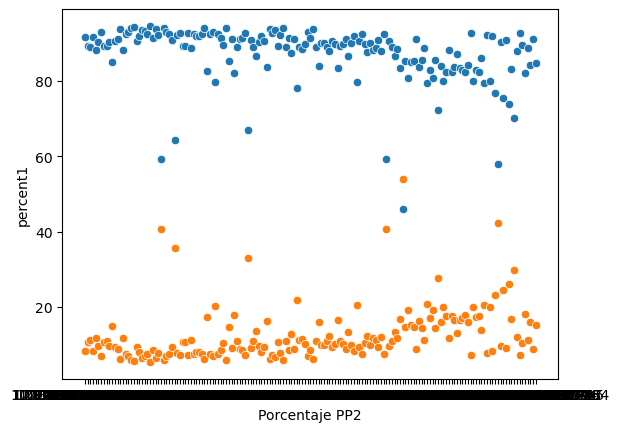

In [61]:
voto_NA['Total'] = voto_NA['1'] + voto_NA['2']
voto_NA["percent1"] = voto_NA["1"] / voto_NA["Total"] * 100
voto_NA["percent2"] = voto_NA["2"] / voto_NA["Total"] * 100
voto_NA1 = voto_NA.sort_values(by=['Porcentaje PP2']) 
ax=sns.scatterplot(x="Porcentaje PP2", y="percent1", data=voto_NA1);
ax2=sns.scatterplot(x="Porcentaje PP2", y="percent2", data=voto_NA1);

In [62]:
voto_NA1

circuito      1     2      Porcentaje PP2  Total   percent1   percent2
137     0138  28232  2554   10.99803536345776  30786  91.704021   8.295979
115     0116  19357  2287  11.811302908489004  21644  89.433561  10.566439
114     0115  11620  1449  12.044514477053378  13069  88.912694  11.087306
142     0143  17159  1527  12.078005115089514  18686  91.828107   8.171893
154     0155  22255  2954  12.137507201843672  25209  88.281963  11.718037
..       ...    ...   ...                 ...    ...        ...        ...
44      0045   6527  1429   50.07989773090444   7956  82.038713  17.961287
42      0043  13423  1704  53.555066886567715  15127  88.735374  11.264626
5       0006  15966  3006   54.58889761717727  18972  84.155598  15.844402
143     0144   8094   790    9.75225547758843   8884  91.107609   8.892391
20      0021  11518  2050   9.859154929577464  13568  84.890920  15.109080

[167 rows x 7 columns]

##### Nacionalidad/ Argentina

<AxesSubplot:>

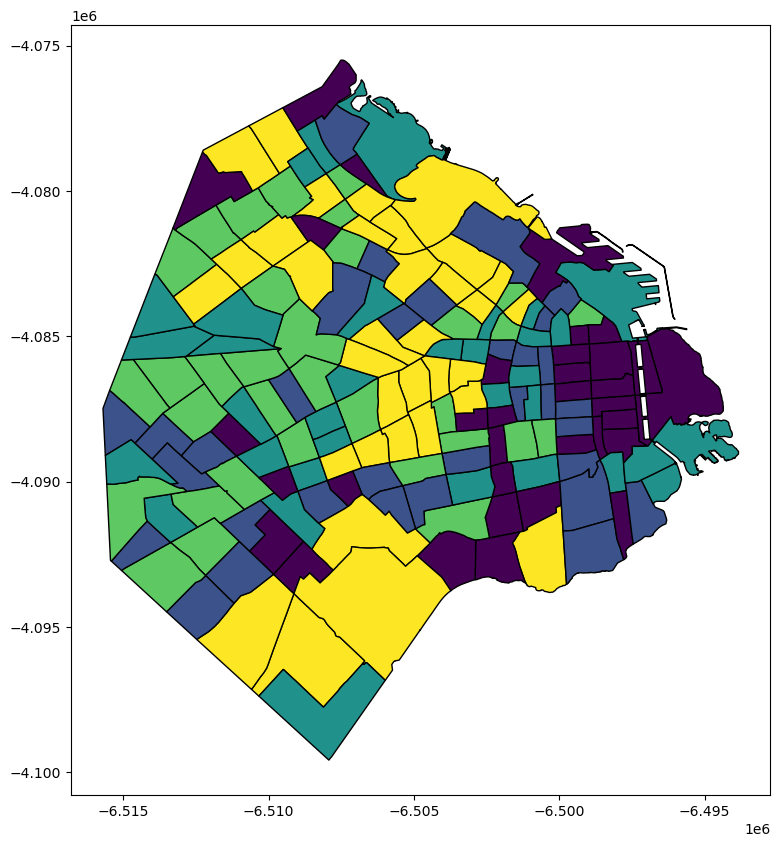

In [63]:
NACIONALIDAD_1 = NACIONALIDAD[NACIONALIDAD["P_NACDAD"]==1]
NACIONALIDAD_1 = (NACIONALIDAD_1[['circuito', 'P_NACDAD']]
.groupby(['circuito'])
.count()
)
NACIONALIDAD_1.reset_index(inplace=True)
NACIONALIDAD_1 = NACIONALIDAD_1.rename(columns = {'index':'circuito'})
NACIONALIDAD_1_merge = pd.merge(circuitos_geometria,NACIONALIDAD_1,on="circuito",how="inner")
NACIONALIDAD_1_merge.plot(column='P_NACDAD', scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Nacionalidad/ Extranjera

<AxesSubplot:>

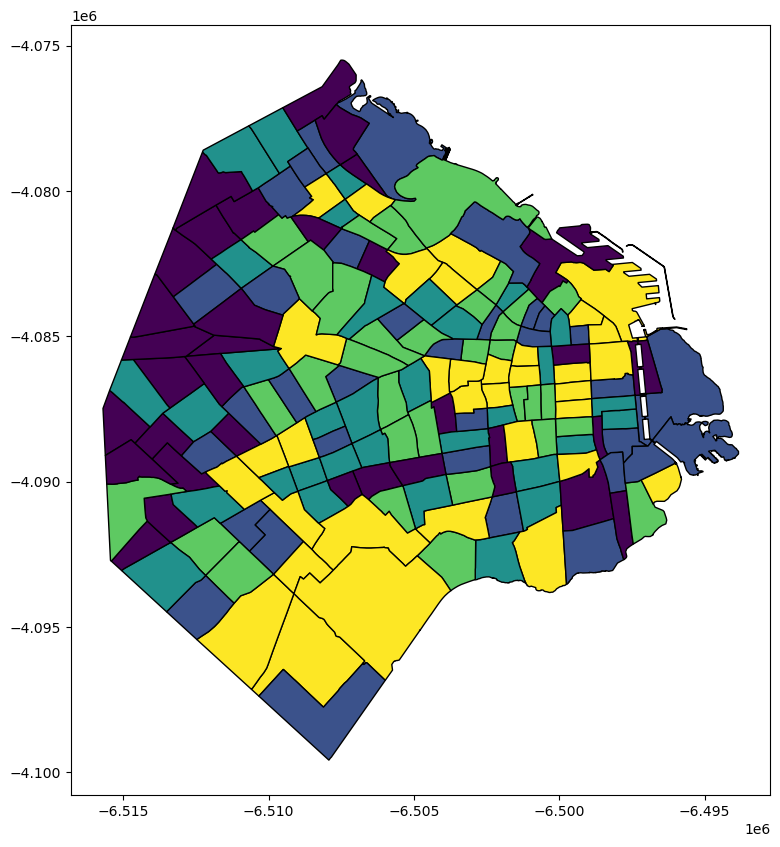

In [64]:
NACIONALIDAD_2 = NACIONALIDAD[NACIONALIDAD["P_NACDAD"]==2]
NACIONALIDAD_2 = (NACIONALIDAD_2[['circuito', 'P_NACDAD']]
.groupby(['circuito'])
.count()
)
NACIONALIDAD_2.reset_index(inplace=True)
NACIONALIDAD_2 = NACIONALIDAD_2.rename(columns = {'index':'circuito'})
NACIONALIDAD_2_merge = pd.merge(circuitos_geometria,NACIONALIDAD_2,on="circuito",how="inner")
NACIONALIDAD_2_merge.plot(column='P_NACDAD', scheme='quantiles', figsize=(10, 10),edgecolor="k")

### HACINAMIENTO

##### Total Hacinamiento/ Promedio

In [65]:
HACINAM = rosetta[["RADIO","INDHAC"]]
pd.unique(HACINAM["INDHAC"])

array([1, 6, 3, 4, 7, 2, 5], dtype=int64)

In [66]:
HACINAM = rosetta[["RADIO","INDHAC"]]
HACINAMIENTO = pd.merge(HACINAM,tabla_intermedia,on="RADIO",how="inner")
HACINAMIENTO = HACINAMIENTO[["circuito","INDHAC"]]
HACINAMIENTO_agrupado = HACINAMIENTO.groupby(['circuito']).mean()
HACINAMIENTO_agrupado.reset_index(inplace=True)
HACINAMIENTO_agrupado = HACINAMIENTO_agrupado.rename(columns = {'index':'circuito'})
HACINAMIENTOMERG = pd.merge(circuitos_geometria,HACINAMIENTO_agrupado,on="circuito",how="inner")
#HACINAMIENTOMERG.plot(column='INDHAC', scheme='quantiles', figsize=(10, 10),edgecolor="k")

In [67]:
voto_HAC = pd.merge(voto_circuito2,HACINAMIENTOMERG,on="circuito",how="inner")
voto_HAC = voto_HAC.drop(["geometry"], axis=1)
voto_HAC = voto_HAC.sort_values(by=['Porcentaje PP2']).head(10)
voto_HAC

circuito      Porcentaje PP2    INDHAC
137     0138   10.99803536345776  2.587410
115     0116  11.811302908489004  2.933284
114     0115  12.044514477053378  2.919045
142     0143  12.078005115089514  2.449053
154     0155  12.137507201843672  2.791344
112     0113  12.455767869780608  2.845342
102     0103  12.765169059749883  2.695134
113     0114  12.960473245496102  2.793098
141     0142  13.462481608631682  2.176978
157     0158  13.719412724306688  2.753821

In [90]:
DE = HACINAMIENTO.groupby(['circuito']).agg(["mean","std"])
DE_M = pd.merge(voto_circuito2,DE,on="circuito",how="inner")
DE_M = DE_M.sort_values(by=['Porcentaje PP2'])
DE_M


C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\3736002858.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  DE_M = pd.merge(voto_circuito2,DE,on="circuito",how="inner")


circuito      Porcentaje PP2  (INDHAC, mean)  (INDHAC, std)
137     0138   10.99803536345776        2.587410       1.241757
115     0116  11.811302908489004        2.933284       1.298061
114     0115  12.044514477053378        2.919045       1.332540
142     0143  12.078005115089514        2.449053       1.198719
154     0155  12.137507201843672        2.791344       1.359530
..       ...                 ...             ...            ...
44      0045   50.07989773090444        3.591126       1.561597
42      0043  53.555066886567715        3.366960       1.705937
5       0006   54.58889761717727        2.554343       1.540468
143     0144    9.75225547758843        2.405561       1.338380
20      0021   9.859154929577464        2.425708       1.585506

[167 rows x 4 columns]

In [68]:
voto_H = pd.merge(voto_circuito2,HACINAMIENTO,on="circuito",how="inner")
voto_H = (voto_H.groupby(["circuito","INDHAC"])
    .size()
    .to_frame(name="count")
      )
voto_H = voto_H.unstack()
voto_H

count                                                 
INDHAC         1       2       3       4        5       6       7
circuito                                                         
0001      2060.0  1645.0  3725.0  1028.0   1368.0   439.0   200.0
0002      1878.0  1760.0  3375.0   752.0   1332.0   385.0   506.0
0003       486.0   611.0  1031.0   267.0    775.0   352.0    62.0
0004       351.0   425.0   625.0    51.0     14.0     NaN     7.0
0005       843.0   879.0  5112.0  2814.0  11708.0  5940.0  1602.0
...          ...     ...     ...     ...      ...     ...     ...
0163      2102.0  2696.0  5225.0  1413.0   1969.0   399.0   277.0
0164      2042.0  2371.0  4584.0  1287.0   2034.0   661.0   701.0
0165      3613.0  5272.0  8129.0  1936.0   2099.0   458.0   229.0
0166      2785.0  4679.0  6904.0  1537.0   1215.0   111.0   258.0
0167      2308.0  3744.0  5650.0  1141.0    812.0    67.0   190.0

[167 rows x 7 columns]

In [69]:
voto_H = pd.merge(voto_H,voto_circuito2,on="circuito",how="inner")
voto_H

C:\Users\Angelo\AppData\Local\Temp\ipykernel_12624\701803574.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  voto_H = pd.merge(voto_H,voto_circuito2,on="circuito",how="inner")


circuito  (count, 1)  (count, 2)  (count, 3)  (count, 4)  (count, 5)  \
0       0001      2060.0      1645.0      3725.0      1028.0      1368.0   
1       0002      1878.0      1760.0      3375.0       752.0      1332.0   
2       0003       486.0       611.0      1031.0       267.0       775.0   
3       0004       351.0       425.0       625.0        51.0        14.0   
4       0005       843.0       879.0      5112.0      2814.0     11708.0   
..       ...         ...         ...         ...         ...         ...   
162     0163      2102.0      2696.0      5225.0      1413.0      1969.0   
163     0164      2042.0      2371.0      4584.0      1287.0      2034.0   
164     0165      3613.0      5272.0      8129.0      1936.0      2099.0   
165     0166      2785.0      4679.0      6904.0      1537.0      1215.0   
166     0167      2308.0      3744.0      5650.0      1141.0       812.0   

     (count, 6)  (count, 7)      Porcentaje PP2  
0         439.0       200.0  25.951854581183987  
1         385.0       506.0   25.39796529024536  
2         352.0        62.0  31.351351351351354  
3           NaN         7.0    28.9166017147311  
4        5940.0      1602.0  23.229671897289585  
..          ...         ...                 ...  
162       399.0       277.0  20.777798064633924  
163       661.0       701.0  18.520323618286383  
164       458.0       229.0  20.784336442101605  
165       111.0       258.0  18.365742064626822  
166        67.0       190.0   18.39985519051498  

[167 rows x 9 columns]

In [70]:
voto_H.rename(columns={list(voto_H)[1]:'1'}, inplace=True)
voto_H.rename(columns={list(voto_H)[2]:'2'}, inplace=True)
voto_H.rename(columns={list(voto_H)[3]:'3'}, inplace=True)
voto_H.rename(columns={list(voto_H)[4]:'4'}, inplace=True)
voto_H.rename(columns={list(voto_H)[5]:'5'}, inplace=True)
voto_H.rename(columns={list(voto_H)[6]:'6'}, inplace=True)
voto_H.rename(columns={list(voto_H)[7]:'7'}, inplace=True)
voto_H.rename(columns={list(voto_H)[8]:'Porcentaje PP2'}, inplace=True)

In [71]:
voto_H

circuito       1       2       3       4        5       6       7  \
0       0001  2060.0  1645.0  3725.0  1028.0   1368.0   439.0   200.0   
1       0002  1878.0  1760.0  3375.0   752.0   1332.0   385.0   506.0   
2       0003   486.0   611.0  1031.0   267.0    775.0   352.0    62.0   
3       0004   351.0   425.0   625.0    51.0     14.0     NaN     7.0   
4       0005   843.0   879.0  5112.0  2814.0  11708.0  5940.0  1602.0   
..       ...     ...     ...     ...     ...      ...     ...     ...   
162     0163  2102.0  2696.0  5225.0  1413.0   1969.0   399.0   277.0   
163     0164  2042.0  2371.0  4584.0  1287.0   2034.0   661.0   701.0   
164     0165  3613.0  5272.0  8129.0  1936.0   2099.0   458.0   229.0   
165     0166  2785.0  4679.0  6904.0  1537.0   1215.0   111.0   258.0   
166     0167  2308.0  3744.0  5650.0  1141.0    812.0    67.0   190.0   

         Porcentaje PP2  
0    25.951854581183987  
1     25.39796529024536  
2    31.351351351351354  
3      28.9166017147311  
4    23.229671897289585  
..                  ...  
162  20.777798064633924  
163  18.520323618286383  
164  20.784336442101605  
165  18.365742064626822  
166   18.39985519051498  

[167 rows x 9 columns]

In [72]:
voto_H["Total"] = voto_H["1"] + voto_H["2"] + voto_H["3"] + voto_H["4"] + voto_H["5"] + voto_H["6"] + voto_H["7"]

voto_H["p1"] = voto_H["1"] / voto_H["Total"] * 100
voto_H["p2"] = voto_H["2"] / voto_H["Total"] * 100
voto_H["p3"] = voto_H["3"] / voto_H["Total"] * 100
voto_H["p4"] = voto_H["4"] / voto_H["Total"] * 100
voto_H["p5"] = voto_H["5"] / voto_H["Total"] * 100
voto_H["p6"] = voto_H["6"] / voto_H["Total"] * 100
voto_H["p7"] = voto_H["7"] / voto_H["Total"] * 100

voto_H = voto_H.drop(["1","2","3","4","5","6","7"], axis =1)
voto_H = voto_H.sort_values(by=['Porcentaje PP2'])

In [73]:
voto_H

circuito      Porcentaje PP2    Total         p1         p2         p3  \
137     0138   10.99803536345776  30786.0  21.857338  24.231794  38.998246   
115     0116  11.811302908489004  21644.0  14.230272  20.486047  41.965441   
114     0115  12.044514477053378  13069.0  14.568827  21.983319  40.056623   
142     0143  12.078005115089514  18686.0  25.495023  25.580649  36.824360   
154     0155  12.137507201843672  25209.0  18.790908  22.400730  38.450553   
..       ...                 ...      ...        ...        ...        ...   
44      0045   50.07989773090444   7956.0   8.760684  14.391654  32.767722   
42      0043  53.555066886567715  15127.0  12.368612  18.734713  35.327560   
5       0006   54.58889761717727  18972.0  28.853047  25.917141  28.594771   
143     0144    9.75225547758843   8884.0  26.654660  32.068888  29.896443   
20      0021   9.859154929577464  13568.0  33.512677  28.368219  23.540684   

            p4         p5        p6        p7  
137   6.522445   6.278828  0.838043  1.273306  
115   9.064868  10.515616  2.772131  0.965626  
114   9.587574   9.970158  1.836407  1.997092  
142   5.100075   5.373007  0.877662  0.749224  
154   7.116506   9.694950  1.574834  1.971518  
..         ...        ...       ...       ...  
44   13.386124  20.399698  4.336350  5.957768  
42    8.911218  12.223177  2.928538  9.506181  
5     5.086443   5.761122  0.701033  5.086443  
143   3.894642   3.703287  0.495272  3.286808  
20    3.788325   4.193691  0.596993  5.999410  

[167 rows x 10 columns]

##### Hacinamiento/ No

<AxesSubplot:>

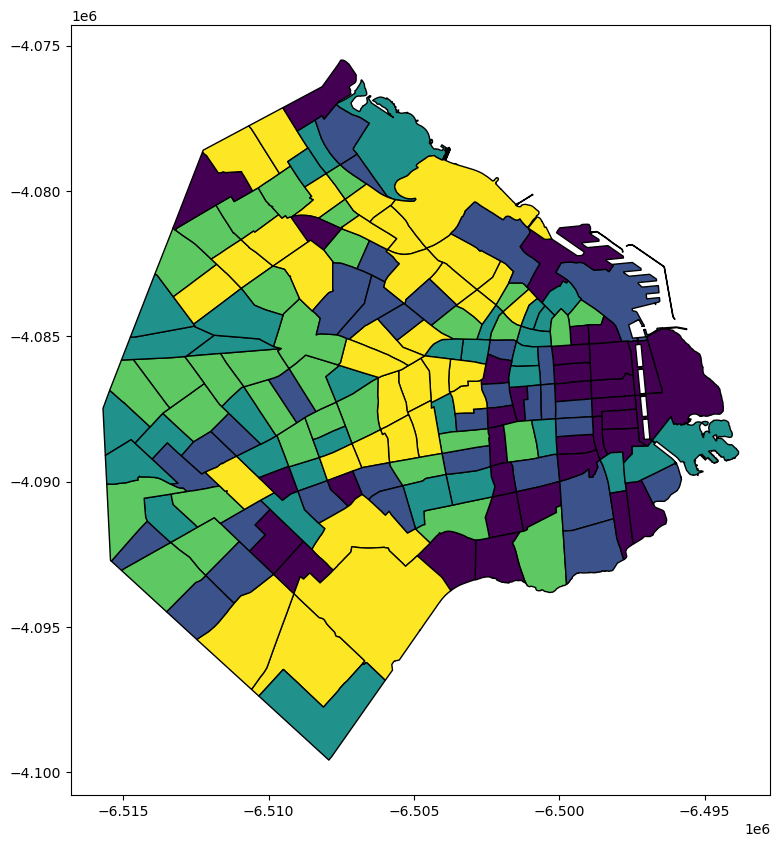

In [74]:
HACINAMIENTO_1 = HACINAMIENTO.loc[HACINAMIENTO["INDHAC"].isin([1,2,3,4])]
HACINAMIENTO_1 = (HACINAMIENTO_1[["circuito", "INDHAC"]]
.groupby(["circuito"])
.count()
)
HACINAMIENTO_1.reset_index(inplace=True)
HACINAMIENTO_1 = HACINAMIENTO_1.rename(columns = {'index':'circuito'})
HACINAMIENTO_1 = pd.merge(circuitos_geometria,HACINAMIENTO_1,on="circuito",how="inner")
HACINAMIENTO_1.plot(column="INDHAC", scheme='quantiles', figsize=(10, 10),edgecolor="k")

##### Hacinamiento/ Sí

<AxesSubplot:>

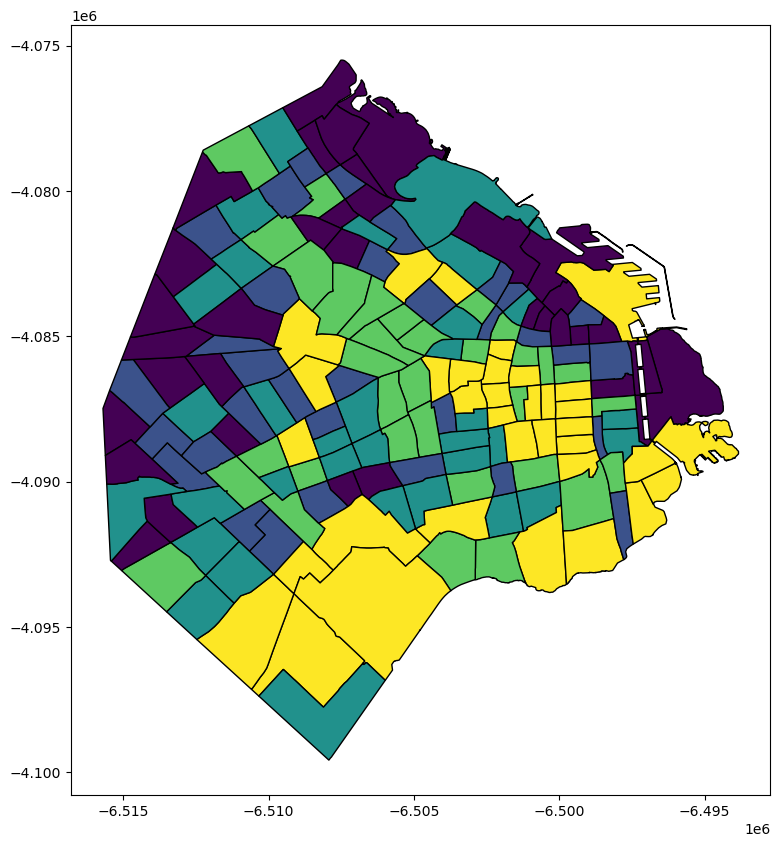

In [75]:
HACINAMIENTO_2 = HACINAMIENTO.loc[HACINAMIENTO["INDHAC"].isin([5,6])]
HACINAMIENTO_2 = (HACINAMIENTO_2[["circuito", "INDHAC"]]
.groupby(["circuito"])
.count()
)
HACINAMIENTO_2.reset_index(inplace=True)
HACINAMIENTO_2 = HACINAMIENTO_2.rename(columns = {'index':'circuito'})
HACINAMIENTO_2 = pd.merge(circuitos_geometria,HACINAMIENTO_2,on="circuito",how="inner")
HACINAMIENTO_2.plot(column="INDHAC", scheme='quantiles', figsize=(10, 10),edgecolor="k")